<a href="https://colab.research.google.com/github/sjtalkar/reinforcement_book_club/blob/main/Ch2_PhysicsOfSports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2. Physics of Sports

[*Applied Machine Learning for Health and Fitness*](https://www.apress.com/9781484257715) by Kevin Ashley (Apress, 2020).

[*Video Course*](http://ai-learning.vhx.tv) Need a deep dive? Watch my [*video course*](http://ai-learning.vhx.tv) that complements this book with additional examples and video-walkthroughs. 

[*Web Site*](http://activefitness.ai) for research and supplemental materials.


Overview
========

This chapter provides an overview of physical principles used in modern sport science. In addition to physics, kinesiology and biomechanics, we will also discuss how deep learning can help a sport data scientist, and vice versa, how we can improve our models by knowing a few physics principles. Classical mechanics is a reliable method of movement analysis, and it's a valuable tool if you're planning to build any practical sports machine learning models. In this chapter I'll show how machine learning models, including neural nets and reinforcement learning can be applied to biomechanics.

Mechanics
=========

-   **Kinematics** describes effects of linear and angular motion: velocity, displacement, acceleration and position.

-   **Kinetics** explains what causes motion: forces, torque and moments.

-   **Work, Energy and Power** are areas where physics helps sports science determine efficiency, calories spend and fatigue.

-   **Skeletal, joint and muscular mechanics** of body tissues, joints and the human frame studies interaction between body parts, stress and strain (this area immediate application to body pose estimation in machine learning).


First Law of Motion (Law of Inertia)
------------------------------------

$$momentum = mass*\ velocity$$

$$p = mv$$

![](https://github.com/Apress/Applied-Machine-Learning-for-Health-and-Fitness/blob/master/images/ch2/fig_2-2.PNG?raw=1)

Figure 2--2 How much force does it take to stop a running football player?

In football, a collision occurs when a tackler stops a running quarterback. Let's say the mass of a quarterback is 100 kg, and his speed 5 m/s. Then the momentum of the quarterback from the first law of motion is 500 kg\*m/s:

In [2]:
m = 100. # kg
v = 5. # m/s

# Momentum of a football runner
p = m * v
print(f'Momentum {p} kg*m/s')

Momentum 500.0 kg*m/s


The impulse it takes for a tackler to stop a quarterback is defined by the speed and time of collision. Let's say the tackle occurs to full stop, when the speed is zero, and the time of collision is half a second, then the impulse:

In [4]:
v1 = 0. # m/s
dt = 0.5 # s

# F=ma or F=m*dv/dt
# F*dt = m*dv

# Impulse to stop a quarterback
dv = v1-v
I = m * dv * dt
print(f'Impulse to stop {I} N*s')



Impulse to stop -250.0 N*s


Second Law of Motion
--------------------

Newton's Second Law relates acceleration of a body with an external force F acting on it:

$force = mass*\ acceleration$

$F = ma$

The unit of force is Newtons (N) = kg\*m/s\^2. In our earlier example, the force with which the tackler acts on the quarterback is:

In [5]:
# Force exherted by tackler on the quarterback
F = m * dv / dt
print(f'Force {F} N')

Force -1000.0 N



Third Law of Motion
-------------------

For every action there's an equal and opposite reaction. For example, when a player hits the volleyball, the ball reacts with an equal force on the player.


Kinematics: Projectile Motion
=============================

Sports often involve projectiles: for example, javelin, balls, jumpers etc. Projectile is any object that is released with initial velocity and is subject to forces of gravity and air resistance.

A projectile displacement along horizontal and vertical axes can be determined as:

$${x = v_{0}t\cos\alpha
}{y = v_{0}t\sin{\alpha + \ \frac{1}{2}gt^{2}}\ }$$

Given release speed *v*, release angle $\alpha$, release height *h,* the range of a projectile can be calculated using the formula:

$$x = \ \frac{v^{2}}{2g}\ \sin{2\alpha}\left( 1 + \ \sqrt{1 + \ \frac{2gh}{v^{2}\sin\alpha}} \right)$$

or, when the projectile is launched at the ground (i.e. h=0),

$$x = \ \frac{v^{2}}{2g}\ \sin{2\alpha}$$

Formula 2-1 Projectile range when launched from the ground

# Project: Calculate and plot a projectile trajectory and find best range and release angle

In this project we'll find an optimal angle of release for an athlete throwing a projectile. Let's assume the release speed of a projectile at 30 m/s and for simplicity it's released at the ground. To test various angles of release, we'll create a list of test angles from 20 to 50 degrees spaced at 5 degrees:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

g = 9.81 # m/s^2
v = 30 # release speed m/s
angles = np.arange(20, 50, 5)

def projectile(angle, t):
    x = []
    y = []
    for dt in t:
        xt = ((v*dt)*np.cos(angle)) 
        yt = ((v*dt)*np.sin(angle))-((0.5*g)*(dt**2))
        if yt > 0:
            x.append(xt)
            y.append(yt)
    return x,y

Finally, to plot the results and iterate through test angles finding the best angle, determined by maximum horizontal displacement:

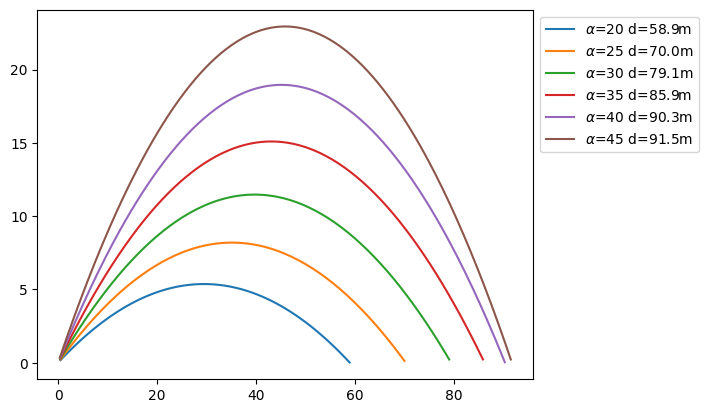

max distance: 91.5m angle=45.0


In [7]:
max_distance = 0
best_angle = None
t = np.linspace(0, 5, 300)
for angle in angles: 
    x,y=projectile(angle*np.pi/180, t)
    distance = x[-1]
    if max_distance < distance:
        max_distance = distance
        best_angle = angle
    plt.plot(x, y, label=r"$\alpha$"+f"={angle:.0f} d={distance:.1f}m") 
    plt.legend(bbox_to_anchor=(1, 1))

plt.show()
print(f"max distance: {max_distance:.1f}m angle={best_angle:.1f}")

# Project. Train a neural network to predict a projectile range

We can also train a machine learning model to predict projectile range. In machine learning finding a continuous value is a problem of regression. We will use Keras to build the model, and Scikit-learn to generate a dataset for training. Since we know the formula for the range of projectile (see Formula 2-1), generating a training dataset should be easy:

In [8]:
x = list(range(20))
v = np.random.uniform(5, 35, 20)

In [10]:
import plotly.express as px
px.line(x=x, y=v)

In [12]:
size = 10
v = np.random.uniform(5, 35, size)
alpha = np.random.uniform(20,60, size)
projectile_range = [np.power(v,2)*np.sin(np.deg2rad(2*alpha)) / g]
y = np.reshape(projectile_range, (size, 1))

In [14]:
y

array([[ 4.76392858],
       [59.17244142],
       [63.51967747],
       [ 8.56424995],
       [60.91795337],
       [21.31591433],
       [32.39834393],
       [37.13158775],
       [85.62518036],
       [19.99065736]])

In [16]:
np.vstack([v,alpha]).transpose()

array([[ 7.95458024, 23.80545372],
       [24.22466098, 40.78093214],
       [26.31294483, 32.07847136],
       [ 9.18640752, 42.29904473],
       [28.72287305, 23.20810044],
       [17.31020352, 22.12780185],
       [18.51649535, 33.98505227],
       [19.59577143, 54.22409284],
       [29.09550077, 41.42986162],
       [16.39120533, 23.43977612]])

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

g = 9.81

def generate_data(size=1000):
    v = np.random.uniform(5, 35, size)
    alpha = np.random.uniform(20,60, size)
    projectile_range = [np.power(v,2)*np.sin(np.deg2rad(2*alpha)) / g]
    y = np.reshape(projectile_range, (size, 1))
    return train_test_split(np.vstack([v,alpha]).transpose(), y, test_size=0.2, random_state=42)

X_train, X_test, Y_train, Y_test = generate_data()

I set the dataset size to 1000 by default, release speed is in range 5-35 m/s, release angle 20-60 degrees. Resulting data is automatically split into training and test set, the input X is an array with rows containing release speed and release angle values, and the output contains predicted range:

In [18]:
print(f"Input set: {X_train.shape} sample value: {X_train[0]}")
print(f"Predicted set: {Y_train.shape} sample value: {Y_train[0]}")

Input set: (800, 2) sample value: [26.64913872 41.20448431]
Predicted set: (800, 1) sample value: [71.75869222]


Next step is building a network in Keras to predict the projectile range. I used a simple network with two hidden layers, and the last layer is a linear layer with no activation. MSE loss function is used a lot in regression models. The MAE (mean absolute error) metric is the value difference between the predictions and the targets. For example a MAE of 0.99 means that you are off by 99 centimeters from the target range:

In [19]:
from keras import models
from keras import layers
from keras import callbacks

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_dim=2))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model
  

Now the network is build, let's train it! The best model will be saved in projectile.hdf5 file.

In [20]:
model = build_model()
checkpoint = callbacks.ModelCheckpoint(filepath="projectile.hdf5", verbose=1, save_best_only=True)
model.fit(X_train, Y_train, epochs=500, batch_size=10, callbacks=[checkpoint])
score = model.evaluate(X_test, Y_test)
Y_pred = model.predict(X_test)
print('Score:', score)

Epoch 1/500
64/80 [=======================>......] - ETA: 0s - loss: 800.9644 - mae: 22.3313 

80/80 [==============================] - 1s 2ms/step - loss: 692.0055 - mae: 20.6531
Epoch 2/500
66/80 [=======================>......] - ETA: 0s - loss: 149.8784 - mae: 9.5918 

80/80 [==============================] - 0s 2ms/step - loss: 144.6563 - mae: 9.3295
Epoch 3/500
67/80 [========================>.....] - ETA: 0s - loss: 115.5207 - mae: 8.1500

80/80 [==============================] - 0s 2ms/step - loss: 117.4406 - mae: 8.1553
Epoch 4/500
68/80 [========================>.....] - ETA: 0s - loss: 120.8134 - mae: 8.2686

80/80 [==============================] - 0s 2ms/step - loss: 114.4953 - mae: 7.9815
Epoch 5/500
51/80 [==================>...........] - ETA: 0s - loss: 113.5039 - mae: 7.9778

80/80 [==============================] - 0s 2ms/step - loss: 112.3119 - mae: 7.8916
Epoch 6/500
69/80 [========================>.....] - ETA: 0s - loss: 108.1262 - mae: 7.5861

80/80 [==============================] - 0s 2ms/step - loss: 108.9075 - mae: 7.6779
Epoch 7/500
60/80 [=====================>........] - ETA: 0s - loss: 110.9324 - mae: 7.7808

80/80 [==============================] - 0s 2ms/step - loss: 105.5858 - mae: 7.5044
Epoch 8/500
68/80 [========================>.....] - ETA: 0s - loss: 103.3380 - mae: 7.4921

80/80 [==============================] - 0s 2ms/step - loss: 101.4555 - mae: 7.3992
Epoch 9/500
65/80 [=======================>......] - ETA: 0s - loss: 101.4627 - mae: 7.4246

80/80 [==============================] - 0s 2ms/step - loss: 101.4537 - mae: 7.4313
Epoch 10/500
59/80 [=====================>........] - ETA: 0s - loss: 98.6391 - mae: 7.2230 

80/80 [==============================] - 0s 2ms/step - loss: 96.6706 - mae: 7.1770
Epoch 11/500
63/80 [======================>.......] - ETA: 0s - loss: 97.5705 - mae: 7.1271

80/80 [==============================] - 0s 2ms/step - loss: 95.2865 - mae: 7.0977
Epoch 12/500
69/80 [========================>.....] - ETA: 0s - loss: 91.4410 - mae: 6.9210

80/80 [==============================] - 0s 2ms/step - loss: 91.9668 - mae: 6.9035
Epoch 13/500
63/80 [======================>.......] - ETA: 0s - loss: 92.0893 - mae: 6.9893

80/80 [==============================] - 0s 2ms/step - loss: 90.4246 - mae: 6.9188
Epoch 14/500
59/80 [=====================>........] - ETA: 0s - loss: 86.2606 - mae: 6.6775

80/80 [==============================] - 0s 2ms/step - loss: 87.3755 - mae: 6.7515
Epoch 15/500
60/80 [=====================>........] - ETA: 0s - loss: 83.5340 - mae: 6.5543

80/80 [==============================] - 0s 2ms/step - loss: 83.5170 - mae: 6.5720
Epoch 16/500
62/80 [======================>.......] - ETA: 0s - loss: 80.1926 - mae: 6.4244

80/80 [==============================] - 0s 2ms/step - loss: 82.2263 - mae: 6.4870
Epoch 17/500
64/80 [=======================>......] - ETA: 0s - loss: 81.1199 - mae: 6.4432

80/80 [==============================] - 0s 2ms/step - loss: 80.1307 - mae: 6.3795
Epoch 18/500
68/80 [========================>.....] - ETA: 0s - loss: 75.1865 - mae: 6.1537

80/80 [==============================] - 0s 2ms/step - loss: 78.7687 - mae: 6.3283
Epoch 19/500
67/80 [========================>.....] - ETA: 0s - loss: 74.1329 - mae: 6.0342

80/80 [==============================] - 0s 2ms/step - loss: 74.7656 - mae: 6.0974
Epoch 20/500
69/80 [========================>.....] - ETA: 0s - loss: 72.5785 - mae: 6.0519

80/80 [==============================] - 0s 2ms/step - loss: 72.2322 - mae: 6.0135
Epoch 21/500
63/80 [======================>.......] - ETA: 0s - loss: 70.4413 - mae: 5.8924

80/80 [==============================] - 0s 2ms/step - loss: 70.0212 - mae: 5.9207
Epoch 22/500
67/80 [========================>.....] - ETA: 0s - loss: 66.9407 - mae: 5.7379

80/80 [==============================] - 0s 2ms/step - loss: 67.7371 - mae: 5.7863
Epoch 23/500
67/80 [========================>.....] - ETA: 0s - loss: 66.7737 - mae: 5.8631

80/80 [==============================] - 0s 2ms/step - loss: 64.0927 - mae: 5.6870
Epoch 24/500
68/80 [========================>.....] - ETA: 0s - loss: 63.1852 - mae: 5.6731

80/80 [==============================] - 0s 2ms/step - loss: 62.0182 - mae: 5.6538
Epoch 25/500
61/80 [=====================>........] - ETA: 0s - loss: 60.3123 - mae: 5.4595

80/80 [==============================] - 0s 2ms/step - loss: 59.8752 - mae: 5.4707
Epoch 26/500
63/80 [======================>.......] - ETA: 0s - loss: 60.5578 - mae: 5.5247

80/80 [==============================] - 0s 2ms/step - loss: 57.2061 - mae: 5.3422
Epoch 27/500
68/80 [========================>.....] - ETA: 0s - loss: 54.1618 - mae: 5.2602

80/80 [==============================] - 0s 2ms/step - loss: 53.9687 - mae: 5.2592
Epoch 28/500
59/80 [=====================>........] - ETA: 0s - loss: 51.5059 - mae: 5.1267

80/80 [==============================] - 0s 2ms/step - loss: 51.8642 - mae: 5.1383
Epoch 29/500
68/80 [========================>.....] - ETA: 0s - loss: 50.2202 - mae: 5.0972

80/80 [==============================] - 0s 2ms/step - loss: 49.0997 - mae: 5.0327
Epoch 30/500
64/80 [=======================>......] - ETA: 0s - loss: 44.9845 - mae: 4.7617

80/80 [==============================] - 0s 2ms/step - loss: 47.9964 - mae: 4.9583
Epoch 31/500
69/80 [========================>.....] - ETA: 0s - loss: 41.4802 - mae: 4.7097

80/80 [==============================] - 0s 2ms/step - loss: 43.6576 - mae: 4.8200
Epoch 32/500
66/80 [=======================>......] - ETA: 0s - loss: 46.0038 - mae: 4.9265

80/80 [==============================] - 0s 2ms/step - loss: 43.3325 - mae: 4.7823
Epoch 33/500
69/80 [========================>.....] - ETA: 0s - loss: 42.3815 - mae: 4.7764

80/80 [==============================] - 0s 2ms/step - loss: 42.4415 - mae: 4.7578
Epoch 34/500
70/80 [=========================>....] - ETA: 0s - loss: 40.7752 - mae: 4.7042

80/80 [==============================] - 0s 2ms/step - loss: 39.6520 - mae: 4.6404
Epoch 35/500
54/80 [===================>..........] - ETA: 0s - loss: 35.9925 - mae: 4.4604

80/80 [==============================] - 0s 2ms/step - loss: 40.3540 - mae: 4.7193
Epoch 36/500
68/80 [========================>.....] - ETA: 0s - loss: 36.2819 - mae: 4.5020

80/80 [==============================] - 0s 2ms/step - loss: 37.0329 - mae: 4.5575
Epoch 37/500
54/80 [===================>..........] - ETA: 0s - loss: 35.7507 - mae: 4.5235

80/80 [==============================] - 0s 2ms/step - loss: 36.4841 - mae: 4.5752
Epoch 38/500
63/80 [======================>.......] - ETA: 0s - loss: 33.4487 - mae: 4.3253

80/80 [==============================] - 0s 2ms/step - loss: 34.9847 - mae: 4.4693
Epoch 39/500
67/80 [========================>.....] - ETA: 0s - loss: 34.4672 - mae: 4.4445

80/80 [==============================] - 0s 2ms/step - loss: 34.4201 - mae: 4.4294
Epoch 40/500
65/80 [=======================>......] - ETA: 0s - loss: 35.5359 - mae: 4.6203

80/80 [==============================] - 0s 2ms/step - loss: 34.0161 - mae: 4.4669
Epoch 41/500
68/80 [========================>.....] - ETA: 0s - loss: 32.6893 - mae: 4.4269

80/80 [==============================] - 0s 2ms/step - loss: 33.0125 - mae: 4.4096
Epoch 42/500
68/80 [========================>.....] - ETA: 0s - loss: 30.0947 - mae: 4.2330

80/80 [==============================] - 0s 2ms/step - loss: 30.5268 - mae: 4.2550
Epoch 43/500
61/80 [=====================>........] - ETA: 0s - loss: 29.9302 - mae: 4.2164

80/80 [==============================] - 0s 2ms/step - loss: 29.7780 - mae: 4.2086
Epoch 44/500
72/80 [==========================>...] - ETA: 0s - loss: 28.9042 - mae: 4.1380

80/80 [==============================] - 0s 2ms/step - loss: 28.9748 - mae: 4.1511
Epoch 45/500
63/80 [======================>.......] - ETA: 0s - loss: 27.2446 - mae: 3.9932

80/80 [==============================] - 0s 2ms/step - loss: 28.1917 - mae: 4.0792
Epoch 46/500
59/80 [=====================>........] - ETA: 0s - loss: 28.4046 - mae: 4.2039

80/80 [==============================] - 0s 2ms/step - loss: 27.2728 - mae: 4.0484
Epoch 47/500
62/80 [======================>.......] - ETA: 0s - loss: 27.7685 - mae: 4.1390

80/80 [==============================] - 0s 2ms/step - loss: 26.4110 - mae: 4.0066
Epoch 48/500
69/80 [========================>.....] - ETA: 0s - loss: 26.7277 - mae: 4.0807

80/80 [==============================] - 0s 2ms/step - loss: 26.0081 - mae: 4.0484
Epoch 49/500
68/80 [========================>.....] - ETA: 0s - loss: 24.7254 - mae: 3.9446

80/80 [==============================] - 0s 2ms/step - loss: 24.7764 - mae: 3.9327
Epoch 50/500
61/80 [=====================>........] - ETA: 0s - loss: 23.7532 - mae: 3.8105

80/80 [==============================] - 0s 2ms/step - loss: 24.1693 - mae: 3.8490
Epoch 51/500
69/80 [========================>.....] - ETA: 0s - loss: 23.5303 - mae: 3.8716

80/80 [==============================] - 0s 2ms/step - loss: 23.9509 - mae: 3.8695
Epoch 52/500
69/80 [========================>.....] - ETA: 0s - loss: 21.7910 - mae: 3.6449

80/80 [==============================] - 0s 2ms/step - loss: 21.1208 - mae: 3.5912
Epoch 53/500
65/80 [=======================>......] - ETA: 0s - loss: 22.7985 - mae: 3.6741

80/80 [==============================] - 0s 2ms/step - loss: 22.6477 - mae: 3.6537
Epoch 54/500
59/80 [=====================>........] - ETA: 0s - loss: 21.5224 - mae: 3.5403

80/80 [==============================] - 0s 2ms/step - loss: 21.4333 - mae: 3.5717
Epoch 55/500
67/80 [========================>.....] - ETA: 0s - loss: 19.2980 - mae: 3.3963

80/80 [==============================] - 0s 2ms/step - loss: 19.7252 - mae: 3.4406
Epoch 56/500
59/80 [=====================>........] - ETA: 0s - loss: 21.9253 - mae: 3.6291

80/80 [==============================] - 0s 2ms/step - loss: 20.4039 - mae: 3.4583
Epoch 57/500
58/80 [====================>.........] - ETA: 0s - loss: 17.5559 - mae: 3.2451

80/80 [==============================] - 0s 2ms/step - loss: 17.1966 - mae: 3.1998
Epoch 58/500
61/80 [=====================>........] - ETA: 0s - loss: 15.7023 - mae: 3.1055

80/80 [==============================] - 0s 2ms/step - loss: 16.4311 - mae: 3.1542
Epoch 59/500
65/80 [=======================>......] - ETA: 0s - loss: 18.2571 - mae: 3.3479

80/80 [==============================] - 0s 2ms/step - loss: 17.3467 - mae: 3.2426
Epoch 60/500
63/80 [======================>.......] - ETA: 0s - loss: 15.7056 - mae: 3.1283

80/80 [==============================] - 0s 2ms/step - loss: 15.8787 - mae: 3.1471
Epoch 61/500
64/80 [=======================>......] - ETA: 0s - loss: 15.7499 - mae: 2.9879

80/80 [==============================] - 0s 2ms/step - loss: 15.9395 - mae: 3.0296
Epoch 62/500
66/80 [=======================>......] - ETA: 0s - loss: 15.0893 - mae: 3.0241

80/80 [==============================] - 0s 2ms/step - loss: 15.6939 - mae: 3.0765
Epoch 63/500
63/80 [======================>.......] - ETA: 0s - loss: 13.9329 - mae: 2.9113

80/80 [==============================] - 0s 2ms/step - loss: 14.4868 - mae: 2.9643
Epoch 64/500
60/80 [=====================>........] - ETA: 0s - loss: 13.4465 - mae: 2.8564

80/80 [==============================] - 0s 2ms/step - loss: 13.9853 - mae: 2.8956
Epoch 65/500
65/80 [=======================>......] - ETA: 0s - loss: 13.9790 - mae: 2.8072

80/80 [==============================] - 0s 2ms/step - loss: 13.4814 - mae: 2.7850
Epoch 66/500
68/80 [========================>.....] - ETA: 0s - loss: 13.9257 - mae: 2.8667

80/80 [==============================] - 0s 2ms/step - loss: 13.1811 - mae: 2.7869
Epoch 67/500
73/80 [==========================>...] - ETA: 0s - loss: 13.1162 - mae: 2.6951

80/80 [==============================] - 0s 2ms/step - loss: 12.7838 - mae: 2.6740
Epoch 68/500
71/80 [=========================>....] - ETA: 0s - loss: 12.3144 - mae: 2.7052

80/80 [==============================] - 0s 2ms/step - loss: 12.3811 - mae: 2.7292
Epoch 69/500
74/80 [==========================>...] - ETA: 0s - loss: 11.2586 - mae: 2.4387

80/80 [==============================] - 0s 2ms/step - loss: 11.4979 - mae: 2.4632
Epoch 70/500
66/80 [=======================>......] - ETA: 0s - loss: 11.3957 - mae: 2.5158

80/80 [==============================] - 0s 2ms/step - loss: 11.6204 - mae: 2.5538
Epoch 71/500
75/80 [===========================>..] - ETA: 0s - loss: 10.9545 - mae: 2.4746

80/80 [==============================] - 0s 2ms/step - loss: 10.4964 - mae: 2.4163
Epoch 72/500
75/80 [===========================>..] - ETA: 0s - loss: 10.7219 - mae: 2.4194

80/80 [==============================] - 0s 2ms/step - loss: 10.4932 - mae: 2.3978
Epoch 73/500
72/80 [==========================>...] - ETA: 0s - loss: 11.2059 - mae: 2.4179

80/80 [==============================] - 0s 2ms/step - loss: 11.6843 - mae: 2.4878
Epoch 74/500
68/80 [========================>.....] - ETA: 0s - loss: 8.5656 - mae: 2.2610

80/80 [==============================] - 0s 2ms/step - loss: 8.9170 - mae: 2.2952
Epoch 75/500
71/80 [=========================>....] - ETA: 0s - loss: 9.9541 - mae: 2.3402

80/80 [==============================] - 0s 2ms/step - loss: 10.9160 - mae: 2.4305
Epoch 76/500
68/80 [========================>.....] - ETA: 0s - loss: 9.0004 - mae: 2.1475

80/80 [==============================] - 0s 2ms/step - loss: 8.9205 - mae: 2.1698
Epoch 77/500
71/80 [=========================>....] - ETA: 0s - loss: 9.5570 - mae: 2.3378

80/80 [==============================] - 0s 2ms/step - loss: 9.6242 - mae: 2.3353
Epoch 78/500
76/80 [===========================>..] - ETA: 0s - loss: 9.3482 - mae: 2.2579

80/80 [==============================] - 0s 2ms/step - loss: 9.0009 - mae: 2.2090
Epoch 79/500
77/80 [===========================>..] - ETA: 0s - loss: 9.0551 - mae: 2.2723

80/80 [==============================] - 0s 2ms/step - loss: 9.2228 - mae: 2.2923
Epoch 80/500
71/80 [=========================>....] - ETA: 0s - loss: 8.7684 - mae: 2.2282

80/80 [==============================] - 0s 2ms/step - loss: 9.0399 - mae: 2.2435
Epoch 81/500
67/80 [========================>.....] - ETA: 0s - loss: 8.5314 - mae: 2.0943

80/80 [==============================] - 0s 2ms/step - loss: 8.8059 - mae: 2.1171
Epoch 82/500
68/80 [========================>.....] - ETA: 0s - loss: 9.2033 - mae: 2.2487

80/80 [==============================] - 0s 2ms/step - loss: 8.9516 - mae: 2.1851
Epoch 83/500
73/80 [==========================>...] - ETA: 0s - loss: 7.0732 - mae: 2.0100

80/80 [==============================] - 0s 2ms/step - loss: 8.0821 - mae: 2.1042
Epoch 84/500
61/80 [=====================>........] - ETA: 0s - loss: 7.3250 - mae: 1.9021

80/80 [==============================] - 0s 2ms/step - loss: 7.7713 - mae: 1.9714
Epoch 85/500
58/80 [====================>.........] - ETA: 0s - loss: 7.8184 - mae: 1.9700

80/80 [==============================] - 0s 2ms/step - loss: 8.7597 - mae: 2.0795
Epoch 86/500
64/80 [=======================>......] - ETA: 0s - loss: 7.8546 - mae: 2.0273

80/80 [==============================] - 0s 2ms/step - loss: 8.9065 - mae: 2.1891
Epoch 87/500
59/80 [=====================>........] - ETA: 0s - loss: 7.3997 - mae: 1.9865

80/80 [==============================] - 0s 2ms/step - loss: 8.3765 - mae: 2.1386
Epoch 88/500
63/80 [======================>.......] - ETA: 0s - loss: 7.7279 - mae: 1.9971

80/80 [==============================] - 0s 2ms/step - loss: 7.1252 - mae: 1.9488
Epoch 89/500
66/80 [=======================>......] - ETA: 0s - loss: 8.7132 - mae: 2.1283

80/80 [==============================] - 0s 2ms/step - loss: 8.2928 - mae: 2.0909
Epoch 90/500
71/80 [=========================>....] - ETA: 0s - loss: 8.0532 - mae: 2.0747

80/80 [==============================] - 0s 2ms/step - loss: 7.6217 - mae: 2.0211
Epoch 91/500
68/80 [========================>.....] - ETA: 0s - loss: 7.2048 - mae: 1.9695

80/80 [==============================] - 0s 2ms/step - loss: 8.2215 - mae: 2.0444
Epoch 92/500
68/80 [========================>.....] - ETA: 0s - loss: 7.3430 - mae: 1.9473

80/80 [==============================] - 0s 2ms/step - loss: 6.5890 - mae: 1.8335
Epoch 93/500
58/80 [====================>.........] - ETA: 0s - loss: 8.3664 - mae: 2.1580

80/80 [==============================] - 0s 2ms/step - loss: 8.4315 - mae: 2.0755
Epoch 94/500
58/80 [====================>.........] - ETA: 0s - loss: 7.0994 - mae: 2.0056

80/80 [==============================] - 0s 2ms/step - loss: 7.9512 - mae: 2.0852
Epoch 95/500
67/80 [========================>.....] - ETA: 0s - loss: 6.9149 - mae: 1.9262

80/80 [==============================] - 0s 2ms/step - loss: 6.8238 - mae: 1.9464
Epoch 96/500
68/80 [========================>.....] - ETA: 0s - loss: 8.2179 - mae: 1.9664

80/80 [==============================] - 0s 2ms/step - loss: 7.5402 - mae: 1.8752
Epoch 97/500
65/80 [=======================>......] - ETA: 0s - loss: 7.5452 - mae: 1.9772

80/80 [==============================] - 0s 2ms/step - loss: 6.9901 - mae: 1.9162
Epoch 98/500
63/80 [======================>.......] - ETA: 0s - loss: 8.4737 - mae: 2.1092

80/80 [==============================] - 0s 2ms/step - loss: 8.2607 - mae: 2.0695
Epoch 99/500
66/80 [=======================>......] - ETA: 0s - loss: 6.8369 - mae: 1.8616

80/80 [==============================] - 0s 2ms/step - loss: 6.2812 - mae: 1.7821
Epoch 100/500
64/80 [=======================>......] - ETA: 0s - loss: 7.6521 - mae: 1.9141

80/80 [==============================] - 0s 2ms/step - loss: 7.1148 - mae: 1.8493
Epoch 101/500
70/80 [=========================>....] - ETA: 0s - loss: 6.8370 - mae: 1.9223

80/80 [==============================] - 0s 2ms/step - loss: 7.3132 - mae: 1.9788
Epoch 102/500
60/80 [=====================>........] - ETA: 0s - loss: 6.4495 - mae: 1.8043

80/80 [==============================] - 0s 2ms/step - loss: 6.1916 - mae: 1.7674
Epoch 103/500
61/80 [=====================>........] - ETA: 0s - loss: 7.3240 - mae: 1.8692

80/80 [==============================] - 0s 2ms/step - loss: 7.3852 - mae: 1.9238
Epoch 104/500
70/80 [=========================>....] - ETA: 0s - loss: 6.3905 - mae: 1.8107

80/80 [==============================] - 0s 2ms/step - loss: 6.9815 - mae: 1.8890
Epoch 105/500
63/80 [======================>.......] - ETA: 0s - loss: 6.1798 - mae: 1.7344

80/80 [==============================] - 0s 2ms/step - loss: 6.8360 - mae: 1.7505
Epoch 106/500
65/80 [=======================>......] - ETA: 0s - loss: 6.7938 - mae: 1.9145

80/80 [==============================] - 0s 2ms/step - loss: 6.8952 - mae: 1.9338
Epoch 107/500
64/80 [=======================>......] - ETA: 0s - loss: 6.9498 - mae: 1.8878

80/80 [==============================] - 0s 2ms/step - loss: 6.9296 - mae: 1.9262
Epoch 108/500
61/80 [=====================>........] - ETA: 0s - loss: 6.6673 - mae: 1.8212

80/80 [==============================] - 0s 2ms/step - loss: 7.2948 - mae: 1.9222
Epoch 109/500
63/80 [======================>.......] - ETA: 0s - loss: 6.6337 - mae: 1.8447

80/80 [==============================] - 0s 2ms/step - loss: 7.1337 - mae: 1.8740
Epoch 110/500
63/80 [======================>.......] - ETA: 0s - loss: 5.9464 - mae: 1.8083

80/80 [==============================] - 0s 2ms/step - loss: 5.8069 - mae: 1.7590
Epoch 111/500
63/80 [======================>.......] - ETA: 0s - loss: 6.5814 - mae: 1.8450

80/80 [==============================] - 0s 2ms/step - loss: 7.1099 - mae: 1.8784
Epoch 112/500
62/80 [======================>.......] - ETA: 0s - loss: 6.2778 - mae: 1.8602

80/80 [==============================] - 0s 2ms/step - loss: 7.0726 - mae: 1.9657
Epoch 113/500
57/80 [====================>.........] - ETA: 0s - loss: 5.4107 - mae: 1.7493

80/80 [==============================] - 0s 2ms/step - loss: 5.4137 - mae: 1.7302
Epoch 114/500
63/80 [======================>.......] - ETA: 0s - loss: 7.1040 - mae: 1.9348

80/80 [==============================] - 0s 2ms/step - loss: 6.9881 - mae: 1.9340
Epoch 115/500
70/80 [=========================>....] - ETA: 0s - loss: 5.7560 - mae: 1.7693

80/80 [==============================] - 0s 2ms/step - loss: 6.1528 - mae: 1.8333
Epoch 116/500
58/80 [====================>.........] - ETA: 0s - loss: 6.5726 - mae: 1.8814

80/80 [==============================] - 0s 2ms/step - loss: 6.5826 - mae: 1.8545
Epoch 117/500
63/80 [======================>.......] - ETA: 0s - loss: 6.1591 - mae: 1.6912

80/80 [==============================] - 0s 2ms/step - loss: 6.5743 - mae: 1.8098
Epoch 118/500
61/80 [=====================>........] - ETA: 0s - loss: 6.1317 - mae: 1.7549

80/80 [==============================] - 0s 2ms/step - loss: 6.4214 - mae: 1.8348
Epoch 119/500
62/80 [======================>.......] - ETA: 0s - loss: 6.2217 - mae: 1.7863

80/80 [==============================] - 0s 2ms/step - loss: 6.2339 - mae: 1.7883
Epoch 120/500
67/80 [========================>.....] - ETA: 0s - loss: 6.0936 - mae: 1.7657

80/80 [==============================] - 0s 2ms/step - loss: 6.6208 - mae: 1.8160
Epoch 121/500
69/80 [========================>.....] - ETA: 0s - loss: 5.4810 - mae: 1.6872

80/80 [==============================] - 0s 2ms/step - loss: 5.7851 - mae: 1.7468
Epoch 122/500
56/80 [====================>.........] - ETA: 0s - loss: 5.8714 - mae: 1.7448

80/80 [==============================] - 0s 2ms/step - loss: 5.9297 - mae: 1.7272
Epoch 123/500
58/80 [====================>.........] - ETA: 0s - loss: 5.4323 - mae: 1.6804

80/80 [==============================] - 0s 2ms/step - loss: 5.8719 - mae: 1.7751
Epoch 124/500
65/80 [=======================>......] - ETA: 0s - loss: 6.3734 - mae: 1.8544

80/80 [==============================] - 0s 2ms/step - loss: 5.9335 - mae: 1.7454
Epoch 125/500
62/80 [======================>.......] - ETA: 0s - loss: 6.1507 - mae: 1.7700

80/80 [==============================] - 0s 2ms/step - loss: 6.1386 - mae: 1.7786
Epoch 126/500
61/80 [=====================>........] - ETA: 0s - loss: 6.0168 - mae: 1.7644

80/80 [==============================] - 0s 2ms/step - loss: 5.7828 - mae: 1.7026
Epoch 127/500
63/80 [======================>.......] - ETA: 0s - loss: 6.4243 - mae: 1.8186

80/80 [==============================] - 0s 2ms/step - loss: 6.3060 - mae: 1.8313
Epoch 128/500
64/80 [=======================>......] - ETA: 0s - loss: 5.8321 - mae: 1.7945

80/80 [==============================] - 0s 2ms/step - loss: 5.6567 - mae: 1.7743
Epoch 129/500
60/80 [=====================>........] - ETA: 0s - loss: 5.8949 - mae: 1.6984

80/80 [==============================] - 0s 2ms/step - loss: 5.7648 - mae: 1.6719
Epoch 130/500
62/80 [======================>.......] - ETA: 0s - loss: 6.1119 - mae: 1.7999

80/80 [==============================] - 0s 2ms/step - loss: 5.8860 - mae: 1.7646
Epoch 131/500
67/80 [========================>.....] - ETA: 0s - loss: 6.6855 - mae: 1.8763

80/80 [==============================] - 0s 2ms/step - loss: 5.8593 - mae: 1.7255
Epoch 132/500
54/80 [===================>..........] - ETA: 0s - loss: 5.4237 - mae: 1.6496

80/80 [==============================] - 0s 2ms/step - loss: 5.5460 - mae: 1.6538
Epoch 133/500
60/80 [=====================>........] - ETA: 0s - loss: 6.5496 - mae: 1.8914

80/80 [==============================] - 0s 2ms/step - loss: 6.1174 - mae: 1.8233
Epoch 134/500
61/80 [=====================>........] - ETA: 0s - loss: 5.4642 - mae: 1.6280

80/80 [==============================] - 0s 2ms/step - loss: 5.3423 - mae: 1.6053
Epoch 135/500
56/80 [====================>.........] - ETA: 0s - loss: 5.9602 - mae: 1.8005

80/80 [==============================] - 0s 2ms/step - loss: 5.9500 - mae: 1.7309
Epoch 136/500
61/80 [=====================>........] - ETA: 0s - loss: 6.0949 - mae: 1.7605

80/80 [==============================] - 0s 2ms/step - loss: 5.5185 - mae: 1.7024
Epoch 137/500
64/80 [=======================>......] - ETA: 0s - loss: 5.4068 - mae: 1.6692

80/80 [==============================] - 0s 2ms/step - loss: 5.9936 - mae: 1.7575
Epoch 138/500
70/80 [=========================>....] - ETA: 0s - loss: 5.4715 - mae: 1.7319

80/80 [==============================] - 0s 2ms/step - loss: 5.7935 - mae: 1.7585
Epoch 139/500
62/80 [======================>.......] - ETA: 0s - loss: 4.9897 - mae: 1.4483

80/80 [==============================] - 0s 2ms/step - loss: 5.0609 - mae: 1.4947
Epoch 140/500
55/80 [===================>..........] - ETA: 0s - loss: 5.0563 - mae: 1.5889

80/80 [==============================] - 0s 2ms/step - loss: 5.3035 - mae: 1.6497
Epoch 141/500
61/80 [=====================>........] - ETA: 0s - loss: 6.6996 - mae: 1.9126

80/80 [==============================] - 0s 2ms/step - loss: 6.4851 - mae: 1.8607
Epoch 142/500
57/80 [====================>.........] - ETA: 0s - loss: 5.1631 - mae: 1.5217

80/80 [==============================] - 0s 2ms/step - loss: 5.5233 - mae: 1.6262
Epoch 143/500
61/80 [=====================>........] - ETA: 0s - loss: 6.0967 - mae: 1.5459

80/80 [==============================] - 0s 2ms/step - loss: 5.0319 - mae: 1.4134
Epoch 144/500
65/80 [=======================>......] - ETA: 0s - loss: 6.4409 - mae: 1.7326

80/80 [==============================] - 0s 2ms/step - loss: 5.8797 - mae: 1.6762
Epoch 145/500
59/80 [=====================>........] - ETA: 0s - loss: 5.7798 - mae: 1.7074

80/80 [==============================] - 0s 2ms/step - loss: 5.4048 - mae: 1.6529
Epoch 146/500
67/80 [========================>.....] - ETA: 0s - loss: 4.6327 - mae: 1.4837

80/80 [==============================] - 0s 2ms/step - loss: 5.2368 - mae: 1.5224
Epoch 147/500
64/80 [=======================>......] - ETA: 0s - loss: 5.0291 - mae: 1.6110

80/80 [==============================] - 0s 2ms/step - loss: 5.1758 - mae: 1.6136
Epoch 148/500
66/80 [=======================>......] - ETA: 0s - loss: 4.5771 - mae: 1.5375

80/80 [==============================] - 0s 2ms/step - loss: 5.2395 - mae: 1.6511
Epoch 149/500
58/80 [====================>.........] - ETA: 0s - loss: 4.6864 - mae: 1.5533

80/80 [==============================] - 0s 2ms/step - loss: 5.0367 - mae: 1.6360
Epoch 150/500
67/80 [========================>.....] - ETA: 0s - loss: 5.4771 - mae: 1.6508

80/80 [==============================] - 0s 2ms/step - loss: 5.2422 - mae: 1.6233
Epoch 151/500
63/80 [======================>.......] - ETA: 0s - loss: 5.7000 - mae: 1.6527

80/80 [==============================] - 0s 2ms/step - loss: 5.5798 - mae: 1.6514
Epoch 152/500
74/80 [==========================>...] - ETA: 0s - loss: 5.1961 - mae: 1.5836

80/80 [==============================] - 0s 2ms/step - loss: 5.2737 - mae: 1.6023
Epoch 153/500
72/80 [==========================>...] - ETA: 0s - loss: 5.1490 - mae: 1.6085

80/80 [==============================] - 0s 2ms/step - loss: 4.9303 - mae: 1.5678
Epoch 154/500
67/80 [========================>.....] - ETA: 0s - loss: 5.3081 - mae: 1.5602

80/80 [==============================] - 0s 3ms/step - loss: 5.2003 - mae: 1.5841
Epoch 155/500
72/80 [==========================>...] - ETA: 0s - loss: 5.4224 - mae: 1.7083

80/80 [==============================] - 0s 2ms/step - loss: 5.6692 - mae: 1.7464
Epoch 156/500
70/80 [=========================>....] - ETA: 0s - loss: 5.0985 - mae: 1.6823

80/80 [==============================] - 0s 2ms/step - loss: 4.5443 - mae: 1.5500
Epoch 157/500
69/80 [========================>.....] - ETA: 0s - loss: 5.2956 - mae: 1.6269

80/80 [==============================] - 0s 2ms/step - loss: 5.5213 - mae: 1.6939
Epoch 158/500
79/80 [============================>.] - ETA: 0s - loss: 4.3918 - mae: 1.4433

80/80 [==============================] - 0s 2ms/step - loss: 4.5311 - mae: 1.4697
Epoch 159/500
78/80 [============================>.] - ETA: 0s - loss: 5.0015 - mae: 1.5805

80/80 [==============================] - 0s 2ms/step - loss: 4.9200 - mae: 1.5592
Epoch 160/500
70/80 [=========================>....] - ETA: 0s - loss: 5.3542 - mae: 1.6812

80/80 [==============================] - 0s 2ms/step - loss: 4.9706 - mae: 1.6183
Epoch 161/500
72/80 [==========================>...] - ETA: 0s - loss: 4.8749 - mae: 1.6112

80/80 [==============================] - 0s 2ms/step - loss: 5.3215 - mae: 1.6465
Epoch 162/500
73/80 [==========================>...] - ETA: 0s - loss: 4.5316 - mae: 1.5770

80/80 [==============================] - 0s 2ms/step - loss: 4.8997 - mae: 1.6149
Epoch 163/500
76/80 [===========================>..] - ETA: 0s - loss: 4.6053 - mae: 1.5192

80/80 [==============================] - 0s 2ms/step - loss: 4.9124 - mae: 1.5686
Epoch 164/500
79/80 [============================>.] - ETA: 0s - loss: 5.0336 - mae: 1.5906

80/80 [==============================] - 0s 2ms/step - loss: 5.0105 - mae: 1.5894
Epoch 165/500
76/80 [===========================>..] - ETA: 0s - loss: 5.0965 - mae: 1.5730

80/80 [==============================] - 0s 2ms/step - loss: 4.8780 - mae: 1.5264
Epoch 166/500
73/80 [==========================>...] - ETA: 0s - loss: 4.3096 - mae: 1.4509

80/80 [==============================] - 0s 2ms/step - loss: 4.1026 - mae: 1.4070
Epoch 167/500
66/80 [=======================>......] - ETA: 0s - loss: 5.1618 - mae: 1.6543

80/80 [==============================] - 0s 2ms/step - loss: 4.8675 - mae: 1.6122
Epoch 168/500
78/80 [============================>.] - ETA: 0s - loss: 5.1370 - mae: 1.5681

80/80 [==============================] - 0s 3ms/step - loss: 5.0330 - mae: 1.5480
Epoch 169/500
78/80 [============================>.] - ETA: 0s - loss: 4.9080 - mae: 1.5507

80/80 [==============================] - 0s 3ms/step - loss: 4.8211 - mae: 1.5349
Epoch 170/500
80/80 [==============================] - ETA: 0s - loss: 4.7994 - mae: 1.4710

80/80 [==============================] - 0s 3ms/step - loss: 4.7994 - mae: 1.4710
Epoch 171/500
59/80 [=====================>........] - ETA: 0s - loss: 5.1558 - mae: 1.5676

80/80 [==============================] - 0s 2ms/step - loss: 5.1533 - mae: 1.5564
Epoch 172/500
52/80 [==================>...........] - ETA: 0s - loss: 4.4373 - mae: 1.4726

80/80 [==============================] - 0s 2ms/step - loss: 4.4168 - mae: 1.4706
Epoch 173/500
58/80 [====================>.........] - ETA: 0s - loss: 4.2174 - mae: 1.4173

80/80 [==============================] - 0s 2ms/step - loss: 4.6377 - mae: 1.5211
Epoch 174/500
63/80 [======================>.......] - ETA: 0s - loss: 4.8258 - mae: 1.5128

80/80 [==============================] - 0s 2ms/step - loss: 4.6270 - mae: 1.5059
Epoch 175/500
59/80 [=====================>........] - ETA: 0s - loss: 4.6966 - mae: 1.5524

80/80 [==============================] - 0s 2ms/step - loss: 4.5425 - mae: 1.5288
Epoch 176/500
64/80 [=======================>......] - ETA: 0s - loss: 4.9613 - mae: 1.5373

80/80 [==============================] - 0s 2ms/step - loss: 5.3459 - mae: 1.6114
Epoch 177/500
64/80 [=======================>......] - ETA: 0s - loss: 3.9954 - mae: 1.3351

80/80 [==============================] - 0s 2ms/step - loss: 3.7803 - mae: 1.3356
Epoch 178/500
55/80 [===================>..........] - ETA: 0s - loss: 4.6162 - mae: 1.5031

80/80 [==============================] - 0s 2ms/step - loss: 4.4271 - mae: 1.4353
Epoch 179/500
66/80 [=======================>......] - ETA: 0s - loss: 4.4498 - mae: 1.4099

80/80 [==============================] - 0s 2ms/step - loss: 4.4666 - mae: 1.4468
Epoch 180/500
60/80 [=====================>........] - ETA: 0s - loss: 4.5597 - mae: 1.5114

80/80 [==============================] - 0s 2ms/step - loss: 4.8740 - mae: 1.5624
Epoch 181/500
67/80 [========================>.....] - ETA: 0s - loss: 4.5118 - mae: 1.5123

80/80 [==============================] - 0s 2ms/step - loss: 4.3792 - mae: 1.4903
Epoch 182/500
62/80 [======================>.......] - ETA: 0s - loss: 4.9880 - mae: 1.4802

80/80 [==============================] - 0s 2ms/step - loss: 4.2408 - mae: 1.3576
Epoch 183/500
62/80 [======================>.......] - ETA: 0s - loss: 4.8371 - mae: 1.3958

80/80 [==============================] - 0s 2ms/step - loss: 5.0560 - mae: 1.5111
Epoch 184/500
65/80 [=======================>......] - ETA: 0s - loss: 4.2767 - mae: 1.3587

80/80 [==============================] - 0s 2ms/step - loss: 3.7804 - mae: 1.2792
Epoch 185/500
59/80 [=====================>........] - ETA: 0s - loss: 4.7160 - mae: 1.4209

80/80 [==============================] - 0s 2ms/step - loss: 5.2171 - mae: 1.4735
Epoch 186/500
64/80 [=======================>......] - ETA: 0s - loss: 4.0293 - mae: 1.4387

80/80 [==============================] - 0s 2ms/step - loss: 4.0597 - mae: 1.4407
Epoch 187/500
52/80 [==================>...........] - ETA: 0s - loss: 4.1780 - mae: 1.4300

80/80 [==============================] - 0s 2ms/step - loss: 4.3781 - mae: 1.4463
Epoch 188/500
53/80 [==================>...........] - ETA: 0s - loss: 4.3955 - mae: 1.4068

80/80 [==============================] - 0s 2ms/step - loss: 4.5108 - mae: 1.4798
Epoch 189/500
60/80 [=====================>........] - ETA: 0s - loss: 4.0729 - mae: 1.4641

80/80 [==============================] - 0s 2ms/step - loss: 4.4171 - mae: 1.5002
Epoch 190/500
66/80 [=======================>......] - ETA: 0s - loss: 4.9891 - mae: 1.5507

80/80 [==============================] - 0s 2ms/step - loss: 5.2042 - mae: 1.5859
Epoch 191/500
63/80 [======================>.......] - ETA: 0s - loss: 3.6399 - mae: 1.2889

80/80 [==============================] - 0s 2ms/step - loss: 3.9399 - mae: 1.3937
Epoch 192/500
58/80 [====================>.........] - ETA: 0s - loss: 4.1685 - mae: 1.4868

80/80 [==============================] - 0s 2ms/step - loss: 4.4180 - mae: 1.4765
Epoch 193/500
64/80 [=======================>......] - ETA: 0s - loss: 4.1333 - mae: 1.3798

80/80 [==============================] - 0s 2ms/step - loss: 4.2145 - mae: 1.4115
Epoch 194/500
65/80 [=======================>......] - ETA: 0s - loss: 4.5698 - mae: 1.5193

80/80 [==============================] - 0s 2ms/step - loss: 4.7837 - mae: 1.5440
Epoch 195/500
58/80 [====================>.........] - ETA: 0s - loss: 4.5394 - mae: 1.4749

80/80 [==============================] - 0s 2ms/step - loss: 4.1122 - mae: 1.4211
Epoch 196/500
62/80 [======================>.......] - ETA: 0s - loss: 5.1174 - mae: 1.4949

80/80 [==============================] - 0s 2ms/step - loss: 4.3110 - mae: 1.3710
Epoch 197/500
63/80 [======================>.......] - ETA: 0s - loss: 4.0097 - mae: 1.3842

80/80 [==============================] - 0s 2ms/step - loss: 3.7682 - mae: 1.3501
Epoch 198/500
65/80 [=======================>......] - ETA: 0s - loss: 4.5799 - mae: 1.5911

80/80 [==============================] - 0s 2ms/step - loss: 5.0026 - mae: 1.6250
Epoch 199/500
68/80 [========================>.....] - ETA: 0s - loss: 3.9128 - mae: 1.3977

80/80 [==============================] - 0s 2ms/step - loss: 3.6942 - mae: 1.3538
Epoch 200/500
66/80 [=======================>......] - ETA: 0s - loss: 4.7123 - mae: 1.4408

80/80 [==============================] - 0s 2ms/step - loss: 4.5616 - mae: 1.4291
Epoch 201/500
61/80 [=====================>........] - ETA: 0s - loss: 4.6674 - mae: 1.5486

80/80 [==============================] - 0s 2ms/step - loss: 4.5731 - mae: 1.5480
Epoch 202/500
64/80 [=======================>......] - ETA: 0s - loss: 3.7668 - mae: 1.3473

80/80 [==============================] - 0s 2ms/step - loss: 3.8738 - mae: 1.3627
Epoch 203/500
56/80 [====================>.........] - ETA: 0s - loss: 4.2095 - mae: 1.4190

80/80 [==============================] - 0s 2ms/step - loss: 4.0223 - mae: 1.3823
Epoch 204/500
53/80 [==================>...........] - ETA: 0s - loss: 5.1805 - mae: 1.5085

80/80 [==============================] - 0s 2ms/step - loss: 4.6202 - mae: 1.3738
Epoch 205/500
63/80 [======================>.......] - ETA: 0s - loss: 4.6845 - mae: 1.3998

80/80 [==============================] - 0s 2ms/step - loss: 4.4870 - mae: 1.3692
Epoch 206/500
60/80 [=====================>........] - ETA: 0s - loss: 4.3279 - mae: 1.3569

80/80 [==============================] - 0s 2ms/step - loss: 4.5922 - mae: 1.4056
Epoch 207/500
65/80 [=======================>......] - ETA: 0s - loss: 3.9962 - mae: 1.2924

80/80 [==============================] - 0s 2ms/step - loss: 3.9269 - mae: 1.3235
Epoch 208/500
63/80 [======================>.......] - ETA: 0s - loss: 4.4534 - mae: 1.3331

80/80 [==============================] - 0s 2ms/step - loss: 4.3533 - mae: 1.3339
Epoch 209/500
66/80 [=======================>......] - ETA: 0s - loss: 3.6902 - mae: 1.3818

80/80 [==============================] - 0s 2ms/step - loss: 4.3279 - mae: 1.4050
Epoch 210/500
53/80 [==================>...........] - ETA: 0s - loss: 4.3465 - mae: 1.3715

80/80 [==============================] - 0s 2ms/step - loss: 3.9798 - mae: 1.3379
Epoch 211/500
57/80 [====================>.........] - ETA: 0s - loss: 4.2416 - mae: 1.4998

80/80 [==============================] - 0s 2ms/step - loss: 4.0235 - mae: 1.4308
Epoch 212/500
60/80 [=====================>........] - ETA: 0s - loss: 4.6021 - mae: 1.4690

80/80 [==============================] - 0s 2ms/step - loss: 4.2817 - mae: 1.4402
Epoch 213/500
66/80 [=======================>......] - ETA: 0s - loss: 3.9669 - mae: 1.2834

80/80 [==============================] - 0s 2ms/step - loss: 4.0834 - mae: 1.3577
Epoch 214/500
60/80 [=====================>........] - ETA: 0s - loss: 4.1849 - mae: 1.4498

80/80 [==============================] - 0s 2ms/step - loss: 3.8443 - mae: 1.3527
Epoch 215/500
67/80 [========================>.....] - ETA: 0s - loss: 4.7097 - mae: 1.4537

80/80 [==============================] - 0s 2ms/step - loss: 4.1642 - mae: 1.3643
Epoch 216/500
59/80 [=====================>........] - ETA: 0s - loss: 4.0798 - mae: 1.4230

80/80 [==============================] - 0s 2ms/step - loss: 4.3090 - mae: 1.4655
Epoch 217/500
53/80 [==================>...........] - ETA: 0s - loss: 3.6655 - mae: 1.2781

80/80 [==============================] - 0s 2ms/step - loss: 3.6840 - mae: 1.3379
Epoch 218/500
65/80 [=======================>......] - ETA: 0s - loss: 4.6507 - mae: 1.4144

80/80 [==============================] - 0s 2ms/step - loss: 4.1199 - mae: 1.3280
Epoch 219/500
60/80 [=====================>........] - ETA: 0s - loss: 4.0637 - mae: 1.3481

80/80 [==============================] - 0s 2ms/step - loss: 4.0802 - mae: 1.3682
Epoch 220/500
62/80 [======================>.......] - ETA: 0s - loss: 3.8646 - mae: 1.3557

80/80 [==============================] - 0s 2ms/step - loss: 3.9899 - mae: 1.3909
Epoch 221/500
62/80 [======================>.......] - ETA: 0s - loss: 4.1649 - mae: 1.3209

80/80 [==============================] - 0s 2ms/step - loss: 4.3294 - mae: 1.3333
Epoch 222/500
67/80 [========================>.....] - ETA: 0s - loss: 3.3170 - mae: 1.2865

80/80 [==============================] - 0s 2ms/step - loss: 3.5911 - mae: 1.3483
Epoch 223/500
58/80 [====================>.........] - ETA: 0s - loss: 4.2417 - mae: 1.3499

80/80 [==============================] - 0s 2ms/step - loss: 4.0181 - mae: 1.3135
Epoch 224/500
64/80 [=======================>......] - ETA: 0s - loss: 3.7771 - mae: 1.3163

80/80 [==============================] - 0s 2ms/step - loss: 3.8815 - mae: 1.3649
Epoch 225/500
67/80 [========================>.....] - ETA: 0s - loss: 3.6904 - mae: 1.4256

80/80 [==============================] - 0s 2ms/step - loss: 3.8258 - mae: 1.4093
Epoch 226/500
56/80 [====================>.........] - ETA: 0s - loss: 4.2707 - mae: 1.3594

80/80 [==============================] - 0s 2ms/step - loss: 4.4104 - mae: 1.3593
Epoch 227/500
65/80 [=======================>......] - ETA: 0s - loss: 3.1386 - mae: 1.2296

80/80 [==============================] - 0s 2ms/step - loss: 3.7299 - mae: 1.3142
Epoch 228/500
59/80 [=====================>........] - ETA: 0s - loss: 3.5638 - mae: 1.2816

80/80 [==============================] - 0s 2ms/step - loss: 3.8046 - mae: 1.2605
Epoch 229/500
65/80 [=======================>......] - ETA: 0s - loss: 4.5371 - mae: 1.4316

80/80 [==============================] - 0s 2ms/step - loss: 4.4958 - mae: 1.4439
Epoch 230/500
61/80 [=====================>........] - ETA: 0s - loss: 3.3859 - mae: 1.3202

80/80 [==============================] - 0s 2ms/step - loss: 3.4306 - mae: 1.2984
Epoch 231/500
59/80 [=====================>........] - ETA: 0s - loss: 3.4993 - mae: 1.2700

80/80 [==============================] - 0s 2ms/step - loss: 3.9242 - mae: 1.3447
Epoch 232/500
64/80 [=======================>......] - ETA: 0s - loss: 3.7876 - mae: 1.3834

80/80 [==============================] - 0s 2ms/step - loss: 3.7234 - mae: 1.3708
Epoch 233/500
59/80 [=====================>........] - ETA: 0s - loss: 3.8637 - mae: 1.3052

80/80 [==============================] - 0s 2ms/step - loss: 4.0277 - mae: 1.3601
Epoch 234/500
54/80 [===================>..........] - ETA: 0s - loss: 3.8075 - mae: 1.3238

80/80 [==============================] - 0s 2ms/step - loss: 3.7831 - mae: 1.3301
Epoch 235/500
79/80 [============================>.] - ETA: 0s - loss: 3.6787 - mae: 1.3868

80/80 [==============================] - 0s 2ms/step - loss: 3.6864 - mae: 1.3915
Epoch 236/500
51/80 [==================>...........] - ETA: 0s - loss: 4.0919 - mae: 1.4046

80/80 [==============================] - 0s 2ms/step - loss: 3.7824 - mae: 1.3630
Epoch 237/500
76/80 [===========================>..] - ETA: 0s - loss: 4.0873 - mae: 1.3781

80/80 [==============================] - 0s 2ms/step - loss: 4.1366 - mae: 1.3944
Epoch 238/500
62/80 [======================>.......] - ETA: 0s - loss: 4.2653 - mae: 1.3202

80/80 [==============================] - 0s 3ms/step - loss: 4.4416 - mae: 1.3947
Epoch 239/500
66/80 [=======================>......] - ETA: 0s - loss: 4.4152 - mae: 1.4191

80/80 [==============================] - 0s 2ms/step - loss: 4.5353 - mae: 1.4211
Epoch 240/500
69/80 [========================>.....] - ETA: 0s - loss: 3.0222 - mae: 1.2421

80/80 [==============================] - 0s 3ms/step - loss: 3.1956 - mae: 1.2538
Epoch 241/500
68/80 [========================>.....] - ETA: 0s - loss: 3.8467 - mae: 1.4290

80/80 [==============================] - 0s 2ms/step - loss: 4.0590 - mae: 1.4676
Epoch 242/500
72/80 [==========================>...] - ETA: 0s - loss: 3.9892 - mae: 1.2872

80/80 [==============================] - 0s 2ms/step - loss: 3.6496 - mae: 1.2151
Epoch 243/500
71/80 [=========================>....] - ETA: 0s - loss: 3.2871 - mae: 1.1720

80/80 [==============================] - 0s 2ms/step - loss: 3.8482 - mae: 1.2387
Epoch 244/500
75/80 [===========================>..] - ETA: 0s - loss: 3.5878 - mae: 1.1811

80/80 [==============================] - 0s 2ms/step - loss: 3.4745 - mae: 1.1634
Epoch 245/500
73/80 [==========================>...] - ETA: 0s - loss: 4.0822 - mae: 1.4153

80/80 [==============================] - 0s 2ms/step - loss: 3.9064 - mae: 1.3913
Epoch 246/500
74/80 [==========================>...] - ETA: 0s - loss: 4.2090 - mae: 1.3568

80/80 [==============================] - 0s 2ms/step - loss: 4.0286 - mae: 1.3372
Epoch 247/500
73/80 [==========================>...] - ETA: 0s - loss: 3.5831 - mae: 1.3204

80/80 [==============================] - 0s 2ms/step - loss: 3.3920 - mae: 1.2817
Epoch 248/500
76/80 [===========================>..] - ETA: 0s - loss: 4.0086 - mae: 1.3169

80/80 [==============================] - 0s 2ms/step - loss: 3.8345 - mae: 1.2800
Epoch 249/500
66/80 [=======================>......] - ETA: 0s - loss: 3.2257 - mae: 1.2377

80/80 [==============================] - 0s 2ms/step - loss: 3.5534 - mae: 1.2902
Epoch 250/500
76/80 [===========================>..] - ETA: 0s - loss: 3.5718 - mae: 1.3399

80/80 [==============================] - 0s 2ms/step - loss: 3.4430 - mae: 1.3123
Epoch 251/500
75/80 [===========================>..] - ETA: 0s - loss: 4.0651 - mae: 1.4086

80/80 [==============================] - 0s 2ms/step - loss: 3.8992 - mae: 1.3671
Epoch 252/500
68/80 [========================>.....] - ETA: 0s - loss: 3.4811 - mae: 1.2489

80/80 [==============================] - 0s 2ms/step - loss: 3.8501 - mae: 1.3076
Epoch 253/500
74/80 [==========================>...] - ETA: 0s - loss: 3.8136 - mae: 1.2403

80/80 [==============================] - 0s 2ms/step - loss: 3.6470 - mae: 1.2197
Epoch 254/500
74/80 [==========================>...] - ETA: 0s - loss: 3.1171 - mae: 1.3265

80/80 [==============================] - 0s 2ms/step - loss: 3.2958 - mae: 1.3655
Epoch 255/500
71/80 [=========================>....] - ETA: 0s - loss: 3.5384 - mae: 1.2805

80/80 [==============================] - 0s 2ms/step - loss: 3.7519 - mae: 1.3258
Epoch 256/500
71/80 [=========================>....] - ETA: 0s - loss: 3.8409 - mae: 1.3734

80/80 [==============================] - 0s 2ms/step - loss: 3.5455 - mae: 1.3132
Epoch 257/500
52/80 [==================>...........] - ETA: 0s - loss: 4.1250 - mae: 1.3015

80/80 [==============================] - 0s 2ms/step - loss: 3.6925 - mae: 1.2411
Epoch 258/500
59/80 [=====================>........] - ETA: 0s - loss: 3.5382 - mae: 1.3542

80/80 [==============================] - 0s 2ms/step - loss: 3.7480 - mae: 1.3783
Epoch 259/500
59/80 [=====================>........] - ETA: 0s - loss: 3.2953 - mae: 1.0927

80/80 [==============================] - 0s 2ms/step - loss: 3.3751 - mae: 1.1298
Epoch 260/500
63/80 [======================>.......] - ETA: 0s - loss: 3.6605 - mae: 1.2393

80/80 [==============================] - 0s 2ms/step - loss: 3.8653 - mae: 1.2752
Epoch 261/500
64/80 [=======================>......] - ETA: 0s - loss: 3.6969 - mae: 1.3172

80/80 [==============================] - 0s 2ms/step - loss: 3.7905 - mae: 1.3141
Epoch 262/500
65/80 [=======================>......] - ETA: 0s - loss: 3.1335 - mae: 1.2068

80/80 [==============================] - 0s 2ms/step - loss: 3.3005 - mae: 1.2540
Epoch 263/500
65/80 [=======================>......] - ETA: 0s - loss: 3.3393 - mae: 1.2002

80/80 [==============================] - 0s 2ms/step - loss: 3.2942 - mae: 1.1936
Epoch 264/500
52/80 [==================>...........] - ETA: 0s - loss: 3.6926 - mae: 1.2716

80/80 [==============================] - 0s 2ms/step - loss: 3.4245 - mae: 1.1855
Epoch 265/500
58/80 [====================>.........] - ETA: 0s - loss: 3.7594 - mae: 1.3146

80/80 [==============================] - 0s 2ms/step - loss: 3.6467 - mae: 1.2946
Epoch 266/500
59/80 [=====================>........] - ETA: 0s - loss: 4.1017 - mae: 1.3710

80/80 [==============================] - 0s 2ms/step - loss: 3.7778 - mae: 1.3337
Epoch 267/500
59/80 [=====================>........] - ETA: 0s - loss: 3.7814 - mae: 1.2223

80/80 [==============================] - 0s 2ms/step - loss: 3.7923 - mae: 1.2004
Epoch 268/500
61/80 [=====================>........] - ETA: 0s - loss: 3.5964 - mae: 1.2647

80/80 [==============================] - 0s 2ms/step - loss: 3.5473 - mae: 1.2506
Epoch 269/500
63/80 [======================>.......] - ETA: 0s - loss: 3.4870 - mae: 1.2286

80/80 [==============================] - 0s 2ms/step - loss: 3.1119 - mae: 1.1562
Epoch 270/500
53/80 [==================>...........] - ETA: 0s - loss: 3.5827 - mae: 1.3216

80/80 [==============================] - 0s 2ms/step - loss: 3.6105 - mae: 1.3211
Epoch 271/500
64/80 [=======================>......] - ETA: 0s - loss: 3.3135 - mae: 1.1878

80/80 [==============================] - 0s 2ms/step - loss: 3.6144 - mae: 1.2292
Epoch 272/500
59/80 [=====================>........] - ETA: 0s - loss: 3.8457 - mae: 1.2496

80/80 [==============================] - 0s 2ms/step - loss: 3.4161 - mae: 1.1894
Epoch 273/500
57/80 [====================>.........] - ETA: 0s - loss: 3.3249 - mae: 1.2405

80/80 [==============================] - 0s 2ms/step - loss: 3.2871 - mae: 1.2638
Epoch 274/500
57/80 [====================>.........] - ETA: 0s - loss: 3.3841 - mae: 1.2170

80/80 [==============================] - 0s 2ms/step - loss: 3.0624 - mae: 1.1844
Epoch 275/500
62/80 [======================>.......] - ETA: 0s - loss: 3.6529 - mae: 1.3246

80/80 [==============================] - 0s 2ms/step - loss: 3.7492 - mae: 1.3548
Epoch 276/500
60/80 [=====================>........] - ETA: 0s - loss: 3.9092 - mae: 1.2383

80/80 [==============================] - 0s 2ms/step - loss: 3.6905 - mae: 1.2415
Epoch 277/500
61/80 [=====================>........] - ETA: 0s - loss: 3.6547 - mae: 1.2560

80/80 [==============================] - 0s 2ms/step - loss: 3.8552 - mae: 1.2826
Epoch 278/500
53/80 [==================>...........] - ETA: 0s - loss: 2.9878 - mae: 1.0664

80/80 [==============================] - 0s 2ms/step - loss: 3.3002 - mae: 1.1342
Epoch 279/500
78/80 [============================>.] - ETA: 0s - loss: 3.4106 - mae: 1.2237

80/80 [==============================] - 0s 2ms/step - loss: 3.5316 - mae: 1.2527
Epoch 280/500
59/80 [=====================>........] - ETA: 0s - loss: 3.3374 - mae: 1.2819

80/80 [==============================] - 0s 2ms/step - loss: 3.2417 - mae: 1.2567
Epoch 281/500
53/80 [==================>...........] - ETA: 0s - loss: 3.5805 - mae: 1.2393

80/80 [==============================] - 0s 2ms/step - loss: 3.5961 - mae: 1.2329
Epoch 282/500
63/80 [======================>.......] - ETA: 0s - loss: 3.2275 - mae: 1.2666

80/80 [==============================] - 0s 2ms/step - loss: 3.1628 - mae: 1.2542
Epoch 283/500
77/80 [===========================>..] - ETA: 0s - loss: 3.5778 - mae: 1.2917

80/80 [==============================] - 0s 2ms/step - loss: 3.4516 - mae: 1.2562
Epoch 284/500
56/80 [====================>.........] - ETA: 0s - loss: 3.7561 - mae: 1.2786

80/80 [==============================] - 0s 2ms/step - loss: 3.8446 - mae: 1.3438
Epoch 285/500
51/80 [==================>...........] - ETA: 0s - loss: 3.0451 - mae: 1.1923

80/80 [==============================] - 0s 2ms/step - loss: 3.0178 - mae: 1.1583
Epoch 286/500
59/80 [=====================>........] - ETA: 0s - loss: 3.8343 - mae: 1.3689

80/80 [==============================] - 0s 2ms/step - loss: 3.6049 - mae: 1.3499
Epoch 287/500
57/80 [====================>.........] - ETA: 0s - loss: 3.3325 - mae: 1.3458

80/80 [==============================] - 0s 2ms/step - loss: 3.3803 - mae: 1.3142
Epoch 288/500
61/80 [=====================>........] - ETA: 0s - loss: 3.2818 - mae: 1.2707

80/80 [==============================] - 0s 2ms/step - loss: 3.7131 - mae: 1.3360
Epoch 289/500
52/80 [==================>...........] - ETA: 0s - loss: 2.5299 - mae: 1.0813

80/80 [==============================] - 0s 2ms/step - loss: 3.0785 - mae: 1.1964
Epoch 290/500
51/80 [==================>...........] - ETA: 0s - loss: 2.7343 - mae: 1.1205

80/80 [==============================] - 0s 2ms/step - loss: 3.3557 - mae: 1.2529
Epoch 291/500
58/80 [====================>.........] - ETA: 0s - loss: 3.4066 - mae: 1.1814

80/80 [==============================] - 0s 2ms/step - loss: 3.4520 - mae: 1.1815
Epoch 292/500
56/80 [====================>.........] - ETA: 0s - loss: 3.8592 - mae: 1.2926

80/80 [==============================] - 0s 2ms/step - loss: 3.6504 - mae: 1.2880
Epoch 293/500
58/80 [====================>.........] - ETA: 0s - loss: 3.2310 - mae: 1.1518

80/80 [==============================] - 0s 2ms/step - loss: 3.2177 - mae: 1.1813
Epoch 294/500
61/80 [=====================>........] - ETA: 0s - loss: 3.3324 - mae: 1.2601

80/80 [==============================] - 0s 2ms/step - loss: 3.4307 - mae: 1.2545
Epoch 295/500
62/80 [======================>.......] - ETA: 0s - loss: 3.3860 - mae: 1.2230

80/80 [==============================] - 0s 2ms/step - loss: 3.5444 - mae: 1.2192
Epoch 296/500
61/80 [=====================>........] - ETA: 0s - loss: 2.6081 - mae: 1.1166

80/80 [==============================] - 0s 2ms/step - loss: 3.1443 - mae: 1.1845
Epoch 297/500
51/80 [==================>...........] - ETA: 0s - loss: 3.0039 - mae: 1.0573

80/80 [==============================] - 0s 2ms/step - loss: 3.3283 - mae: 1.0908
Epoch 298/500
60/80 [=====================>........] - ETA: 0s - loss: 3.8176 - mae: 1.3280

80/80 [==============================] - 0s 2ms/step - loss: 3.5405 - mae: 1.2735
Epoch 299/500
62/80 [======================>.......] - ETA: 0s - loss: 3.5680 - mae: 1.2138

80/80 [==============================] - 0s 2ms/step - loss: 3.1474 - mae: 1.1597
Epoch 300/500
58/80 [====================>.........] - ETA: 0s - loss: 3.1235 - mae: 1.2514

80/80 [==============================] - 0s 2ms/step - loss: 3.4758 - mae: 1.2767
Epoch 301/500
62/80 [======================>.......] - ETA: 0s - loss: 3.3547 - mae: 1.2929

80/80 [==============================] - 0s 2ms/step - loss: 3.1705 - mae: 1.2519
Epoch 302/500
62/80 [======================>.......] - ETA: 0s - loss: 3.3855 - mae: 1.2682

80/80 [==============================] - 0s 2ms/step - loss: 3.5575 - mae: 1.2880
Epoch 303/500
48/80 [=================>............] - ETA: 0s - loss: 3.2024 - mae: 1.1653

80/80 [==============================] - 0s 2ms/step - loss: 2.9824 - mae: 1.1552
Epoch 304/500
62/80 [======================>.......] - ETA: 0s - loss: 3.2973 - mae: 1.2173

80/80 [==============================] - 0s 2ms/step - loss: 3.4806 - mae: 1.2253
Epoch 305/500
63/80 [======================>.......] - ETA: 0s - loss: 3.5926 - mae: 1.3305

80/80 [==============================] - 0s 2ms/step - loss: 3.3381 - mae: 1.2569
Epoch 306/500
56/80 [====================>.........] - ETA: 0s - loss: 3.4375 - mae: 1.2398

80/80 [==============================] - 0s 2ms/step - loss: 3.1506 - mae: 1.1933
Epoch 307/500
63/80 [======================>.......] - ETA: 0s - loss: 3.1294 - mae: 1.1369

80/80 [==============================] - 0s 2ms/step - loss: 3.3426 - mae: 1.2111
Epoch 308/500
57/80 [====================>.........] - ETA: 0s - loss: 3.4991 - mae: 1.2964

80/80 [==============================] - 0s 2ms/step - loss: 3.4459 - mae: 1.2346
Epoch 309/500
66/80 [=======================>......] - ETA: 0s - loss: 3.1168 - mae: 1.2339

80/80 [==============================] - 0s 2ms/step - loss: 3.1626 - mae: 1.2319
Epoch 310/500
79/80 [============================>.] - ETA: 0s - loss: 3.1549 - mae: 1.2717

80/80 [==============================] - 0s 2ms/step - loss: 3.1870 - mae: 1.2791
Epoch 311/500
62/80 [======================>.......] - ETA: 0s - loss: 2.7856 - mae: 1.1868

80/80 [==============================] - 0s 2ms/step - loss: 2.7814 - mae: 1.1842
Epoch 312/500
58/80 [====================>.........] - ETA: 0s - loss: 3.4419 - mae: 1.2606

80/80 [==============================] - 0s 2ms/step - loss: 3.4136 - mae: 1.2477
Epoch 313/500
55/80 [===================>..........] - ETA: 0s - loss: 2.6972 - mae: 1.0756

80/80 [==============================] - 0s 2ms/step - loss: 3.3963 - mae: 1.1950
Epoch 314/500
63/80 [======================>.......] - ETA: 0s - loss: 3.2020 - mae: 1.2178

80/80 [==============================] - 0s 2ms/step - loss: 3.1436 - mae: 1.1927
Epoch 315/500
59/80 [=====================>........] - ETA: 0s - loss: 3.2612 - mae: 1.1784

80/80 [==============================] - 0s 2ms/step - loss: 2.9395 - mae: 1.1394
Epoch 316/500
63/80 [======================>.......] - ETA: 0s - loss: 3.1240 - mae: 1.1563

80/80 [==============================] - 0s 2ms/step - loss: 3.2544 - mae: 1.1970
Epoch 317/500
64/80 [=======================>......] - ETA: 0s - loss: 3.6562 - mae: 1.2503

80/80 [==============================] - 0s 2ms/step - loss: 3.3169 - mae: 1.2182
Epoch 318/500
61/80 [=====================>........] - ETA: 0s - loss: 3.2506 - mae: 1.1303

80/80 [==============================] - 0s 2ms/step - loss: 3.0749 - mae: 1.1302
Epoch 319/500
61/80 [=====================>........] - ETA: 0s - loss: 3.6403 - mae: 1.2185

80/80 [==============================] - 0s 2ms/step - loss: 3.2463 - mae: 1.1619
Epoch 320/500
63/80 [======================>.......] - ETA: 0s - loss: 3.3836 - mae: 1.2129

80/80 [==============================] - 0s 2ms/step - loss: 3.2411 - mae: 1.1837
Epoch 321/500
62/80 [======================>.......] - ETA: 0s - loss: 3.4053 - mae: 1.1927

80/80 [==============================] - 0s 2ms/step - loss: 2.8689 - mae: 1.0914
Epoch 322/500
70/80 [=========================>....] - ETA: 0s - loss: 2.9251 - mae: 1.1240

80/80 [==============================] - 0s 2ms/step - loss: 2.8584 - mae: 1.1218
Epoch 323/500
64/80 [=======================>......] - ETA: 0s - loss: 3.6675 - mae: 1.2334

80/80 [==============================] - 0s 3ms/step - loss: 3.1589 - mae: 1.1349
Epoch 324/500
64/80 [=======================>......] - ETA: 0s - loss: 3.2064 - mae: 1.2492

80/80 [==============================] - 0s 2ms/step - loss: 3.2027 - mae: 1.2060
Epoch 325/500
76/80 [===========================>..] - ETA: 0s - loss: 2.9641 - mae: 1.0594

80/80 [==============================] - 0s 2ms/step - loss: 2.8297 - mae: 1.0264
Epoch 326/500
78/80 [============================>.] - ETA: 0s - loss: 3.1538 - mae: 1.1651

80/80 [==============================] - 0s 2ms/step - loss: 3.0997 - mae: 1.1564
Epoch 327/500
78/80 [============================>.] - ETA: 0s - loss: 3.4861 - mae: 1.2556

80/80 [==============================] - 0s 2ms/step - loss: 3.4149 - mae: 1.2398
Epoch 328/500
79/80 [============================>.] - ETA: 0s - loss: 2.8561 - mae: 1.1270

80/80 [==============================] - 0s 2ms/step - loss: 2.8214 - mae: 1.1152
Epoch 329/500
70/80 [=========================>....] - ETA: 0s - loss: 2.7738 - mae: 1.0537

80/80 [==============================] - 0s 2ms/step - loss: 3.2867 - mae: 1.1821
Epoch 330/500
75/80 [===========================>..] - ETA: 0s - loss: 3.5394 - mae: 1.2830

80/80 [==============================] - 0s 2ms/step - loss: 3.3832 - mae: 1.2480
Epoch 331/500
78/80 [============================>.] - ETA: 0s - loss: 2.6564 - mae: 1.0817

80/80 [==============================] - 0s 2ms/step - loss: 2.8537 - mae: 1.1243
Epoch 332/500
74/80 [==========================>...] - ETA: 0s - loss: 2.8062 - mae: 1.2258

80/80 [==============================] - 0s 2ms/step - loss: 2.9589 - mae: 1.2592
Epoch 333/500
74/80 [==========================>...] - ETA: 0s - loss: 3.0072 - mae: 1.0951

80/80 [==============================] - 0s 2ms/step - loss: 3.0175 - mae: 1.1097
Epoch 334/500
65/80 [=======================>......] - ETA: 0s - loss: 3.6120 - mae: 1.2702

80/80 [==============================] - 0s 2ms/step - loss: 3.0649 - mae: 1.1479
Epoch 335/500
78/80 [============================>.] - ETA: 0s - loss: 3.3994 - mae: 1.1791

80/80 [==============================] - 0s 3ms/step - loss: 3.3228 - mae: 1.1613
Epoch 336/500
66/80 [=======================>......] - ETA: 0s - loss: 2.9649 - mae: 1.1683

80/80 [==============================] - 0s 2ms/step - loss: 2.8338 - mae: 1.1523
Epoch 337/500
67/80 [========================>.....] - ETA: 0s - loss: 3.3413 - mae: 1.1158

80/80 [==============================] - 0s 2ms/step - loss: 3.4683 - mae: 1.1666
Epoch 338/500
76/80 [===========================>..] - ETA: 0s - loss: 2.5557 - mae: 1.1199

80/80 [==============================] - 0s 2ms/step - loss: 2.4697 - mae: 1.0979
Epoch 339/500
74/80 [==========================>...] - ETA: 0s - loss: 3.2207 - mae: 1.2203

80/80 [==============================] - 0s 2ms/step - loss: 3.0369 - mae: 1.1802
Epoch 340/500
75/80 [===========================>..] - ETA: 0s - loss: 3.2256 - mae: 1.3193

80/80 [==============================] - 0s 2ms/step - loss: 3.1968 - mae: 1.3149
Epoch 341/500
58/80 [====================>.........] - ETA: 0s - loss: 3.2316 - mae: 1.1138

80/80 [==============================] - 0s 2ms/step - loss: 2.8733 - mae: 1.0265
Epoch 342/500
61/80 [=====================>........] - ETA: 0s - loss: 3.3162 - mae: 1.3340

80/80 [==============================] - 0s 3ms/step - loss: 3.0554 - mae: 1.2946
Epoch 343/500
75/80 [===========================>..] - ETA: 0s - loss: 2.9603 - mae: 1.1933

80/80 [==============================] - 0s 2ms/step - loss: 2.8545 - mae: 1.1783
Epoch 344/500
74/80 [==========================>...] - ETA: 0s - loss: 3.1575 - mae: 1.2266

80/80 [==============================] - 0s 2ms/step - loss: 3.1755 - mae: 1.2338
Epoch 345/500
65/80 [=======================>......] - ETA: 0s - loss: 2.9041 - mae: 1.0867

80/80 [==============================] - 0s 3ms/step - loss: 3.1270 - mae: 1.1453
Epoch 346/500
63/80 [======================>.......] - ETA: 0s - loss: 3.0193 - mae: 1.0977

80/80 [==============================] - 0s 3ms/step - loss: 3.0730 - mae: 1.1558
Epoch 347/500
55/80 [===================>..........] - ETA: 0s - loss: 2.9021 - mae: 1.2261

80/80 [==============================] - 0s 2ms/step - loss: 2.8167 - mae: 1.1765
Epoch 348/500
51/80 [==================>...........] - ETA: 0s - loss: 3.0181 - mae: 1.2658

80/80 [==============================] - 0s 2ms/step - loss: 3.0040 - mae: 1.2123
Epoch 349/500
61/80 [=====================>........] - ETA: 0s - loss: 3.7993 - mae: 1.2329

80/80 [==============================] - 0s 2ms/step - loss: 3.6245 - mae: 1.1899
Epoch 350/500
65/80 [=======================>......] - ETA: 0s - loss: 2.5577 - mae: 0.9910

80/80 [==============================] - 0s 2ms/step - loss: 2.8095 - mae: 1.0898
Epoch 351/500
61/80 [=====================>........] - ETA: 0s - loss: 2.7607 - mae: 1.0349

80/80 [==============================] - 0s 2ms/step - loss: 2.7968 - mae: 1.0576
Epoch 352/500
59/80 [=====================>........] - ETA: 0s - loss: 2.9155 - mae: 1.1132

80/80 [==============================] - 0s 2ms/step - loss: 3.1092 - mae: 1.1336
Epoch 353/500
59/80 [=====================>........] - ETA: 0s - loss: 3.1754 - mae: 1.1891

80/80 [==============================] - 0s 2ms/step - loss: 2.7115 - mae: 1.1111
Epoch 354/500
59/80 [=====================>........] - ETA: 0s - loss: 3.3743 - mae: 1.2405

80/80 [==============================] - 0s 2ms/step - loss: 3.3057 - mae: 1.2031
Epoch 355/500
54/80 [===================>..........] - ETA: 0s - loss: 2.7769 - mae: 1.1588

80/80 [==============================] - 0s 2ms/step - loss: 2.7222 - mae: 1.1348
Epoch 356/500
59/80 [=====================>........] - ETA: 0s - loss: 2.9069 - mae: 1.2086

80/80 [==============================] - 0s 2ms/step - loss: 2.9041 - mae: 1.2042
Epoch 357/500
62/80 [======================>.......] - ETA: 0s - loss: 3.5009 - mae: 1.2580

80/80 [==============================] - 0s 2ms/step - loss: 3.0783 - mae: 1.1321
Epoch 358/500
52/80 [==================>...........] - ETA: 0s - loss: 2.6314 - mae: 1.0889

80/80 [==============================] - 0s 2ms/step - loss: 2.8329 - mae: 1.1639
Epoch 359/500
61/80 [=====================>........] - ETA: 0s - loss: 2.5435 - mae: 1.1029

80/80 [==============================] - 0s 2ms/step - loss: 2.9101 - mae: 1.1680
Epoch 360/500
59/80 [=====================>........] - ETA: 0s - loss: 2.3632 - mae: 1.1342

80/80 [==============================] - 0s 2ms/step - loss: 2.2958 - mae: 1.1059
Epoch 361/500
62/80 [======================>.......] - ETA: 0s - loss: 2.6566 - mae: 1.0654

80/80 [==============================] - 0s 2ms/step - loss: 3.3465 - mae: 1.1492
Epoch 362/500
56/80 [====================>.........] - ETA: 0s - loss: 2.3248 - mae: 0.9306

80/80 [==============================] - 0s 2ms/step - loss: 2.6975 - mae: 1.0369
Epoch 363/500
79/80 [============================>.] - ETA: 0s - loss: 3.2604 - mae: 1.2025

80/80 [==============================] - 0s 2ms/step - loss: 3.2363 - mae: 1.1981
Epoch 364/500
76/80 [===========================>..] - ETA: 0s - loss: 3.2957 - mae: 1.1436

80/80 [==============================] - 0s 2ms/step - loss: 3.1608 - mae: 1.1154
Epoch 365/500
60/80 [=====================>........] - ETA: 0s - loss: 2.4815 - mae: 1.0580

80/80 [==============================] - 0s 2ms/step - loss: 2.9784 - mae: 1.1325
Epoch 366/500
57/80 [====================>.........] - ETA: 0s - loss: 3.1341 - mae: 1.0644

80/80 [==============================] - 0s 2ms/step - loss: 3.0814 - mae: 1.0671
Epoch 367/500
59/80 [=====================>........] - ETA: 0s - loss: 3.2603 - mae: 1.1285

80/80 [==============================] - 0s 2ms/step - loss: 3.0907 - mae: 1.1133
Epoch 368/500
58/80 [====================>.........] - ETA: 0s - loss: 3.2046 - mae: 1.1323

80/80 [==============================] - 0s 2ms/step - loss: 3.5295 - mae: 1.1631
Epoch 369/500
50/80 [=================>............] - ETA: 0s - loss: 2.5543 - mae: 1.0060

80/80 [==============================] - 0s 2ms/step - loss: 2.9533 - mae: 1.0682
Epoch 370/500
59/80 [=====================>........] - ETA: 0s - loss: 2.9210 - mae: 1.1316

80/80 [==============================] - 0s 2ms/step - loss: 2.9748 - mae: 1.1377
Epoch 371/500
60/80 [=====================>........] - ETA: 0s - loss: 2.5738 - mae: 1.0302

80/80 [==============================] - 0s 2ms/step - loss: 2.3619 - mae: 0.9969
Epoch 372/500
61/80 [=====================>........] - ETA: 0s - loss: 3.3192 - mae: 1.1236

80/80 [==============================] - 0s 2ms/step - loss: 3.4184 - mae: 1.1375
Epoch 373/500
63/80 [======================>.......] - ETA: 0s - loss: 2.7550 - mae: 1.0897

80/80 [==============================] - 0s 2ms/step - loss: 2.7494 - mae: 1.1185
Epoch 374/500
58/80 [====================>.........] - ETA: 0s - loss: 3.1035 - mae: 1.1275

80/80 [==============================] - 0s 2ms/step - loss: 2.9426 - mae: 1.1211
Epoch 375/500
49/80 [=================>............] - ETA: 0s - loss: 2.9020 - mae: 1.0240

80/80 [==============================] - 0s 2ms/step - loss: 2.8846 - mae: 1.0867
Epoch 376/500
60/80 [=====================>........] - ETA: 0s - loss: 3.2538 - mae: 1.1705

80/80 [==============================] - 0s 2ms/step - loss: 3.1253 - mae: 1.1357
Epoch 377/500
63/80 [======================>.......] - ETA: 0s - loss: 2.5803 - mae: 1.1102

80/80 [==============================] - 0s 2ms/step - loss: 2.6655 - mae: 1.1192
Epoch 378/500
57/80 [====================>.........] - ETA: 0s - loss: 2.6729 - mae: 1.1362

80/80 [==============================] - 0s 2ms/step - loss: 2.8273 - mae: 1.1563
Epoch 379/500
57/80 [====================>.........] - ETA: 0s - loss: 2.6466 - mae: 1.1440

80/80 [==============================] - 0s 2ms/step - loss: 2.7746 - mae: 1.1695
Epoch 380/500
64/80 [=======================>......] - ETA: 0s - loss: 2.8261 - mae: 1.2277

80/80 [==============================] - 0s 2ms/step - loss: 2.9349 - mae: 1.2495
Epoch 381/500
57/80 [====================>.........] - ETA: 0s - loss: 2.7081 - mae: 1.0962

80/80 [==============================] - 0s 2ms/step - loss: 2.7912 - mae: 1.0960
Epoch 382/500
54/80 [===================>..........] - ETA: 0s - loss: 3.1501 - mae: 1.1200

80/80 [==============================] - 0s 2ms/step - loss: 3.0045 - mae: 1.1359
Epoch 383/500
63/80 [======================>.......] - ETA: 0s - loss: 2.7162 - mae: 1.1160

80/80 [==============================] - 0s 2ms/step - loss: 2.8071 - mae: 1.0996
Epoch 384/500
62/80 [======================>.......] - ETA: 0s - loss: 2.2477 - mae: 0.9405

80/80 [==============================] - 0s 2ms/step - loss: 2.6517 - mae: 1.0773
Epoch 385/500
75/80 [===========================>..] - ETA: 0s - loss: 2.7260 - mae: 1.1390

80/80 [==============================] - 0s 2ms/step - loss: 2.7130 - mae: 1.1381
Epoch 386/500
58/80 [====================>.........] - ETA: 0s - loss: 2.5093 - mae: 1.0585

80/80 [==============================] - 0s 2ms/step - loss: 2.5488 - mae: 1.0816
Epoch 387/500
55/80 [===================>..........] - ETA: 0s - loss: 2.9591 - mae: 1.1934

80/80 [==============================] - 0s 2ms/step - loss: 3.2674 - mae: 1.2013
Epoch 388/500
53/80 [==================>...........] - ETA: 0s - loss: 2.2742 - mae: 0.9310

80/80 [==============================] - 0s 2ms/step - loss: 2.3138 - mae: 1.0068
Epoch 389/500
58/80 [====================>.........] - ETA: 0s - loss: 2.2530 - mae: 1.0411

80/80 [==============================] - 0s 2ms/step - loss: 2.9983 - mae: 1.1768
Epoch 390/500
56/80 [====================>.........] - ETA: 0s - loss: 2.8667 - mae: 1.1182

80/80 [==============================] - 0s 2ms/step - loss: 2.3285 - mae: 1.0034
Epoch 391/500
64/80 [=======================>......] - ETA: 0s - loss: 3.2328 - mae: 1.1778

80/80 [==============================] - 0s 2ms/step - loss: 2.6824 - mae: 1.0475
Epoch 392/500
55/80 [===================>..........] - ETA: 0s - loss: 2.7253 - mae: 1.0527

80/80 [==============================] - 0s 2ms/step - loss: 2.9783 - mae: 1.1261
Epoch 393/500
66/80 [=======================>......] - ETA: 0s - loss: 2.6117 - mae: 1.1129

80/80 [==============================] - 0s 2ms/step - loss: 2.5951 - mae: 1.1140
Epoch 394/500
56/80 [====================>.........] - ETA: 0s - loss: 2.5992 - mae: 1.0621

80/80 [==============================] - 0s 2ms/step - loss: 2.6933 - mae: 1.0891
Epoch 395/500
54/80 [===================>..........] - ETA: 0s - loss: 2.3314 - mae: 1.0577

80/80 [==============================] - 0s 2ms/step - loss: 2.4905 - mae: 1.0386
Epoch 396/500
62/80 [======================>.......] - ETA: 0s - loss: 2.7517 - mae: 1.0535

80/80 [==============================] - 0s 2ms/step - loss: 2.9756 - mae: 1.1136
Epoch 397/500
60/80 [=====================>........] - ETA: 0s - loss: 2.5605 - mae: 1.0580

80/80 [==============================] - 0s 2ms/step - loss: 2.7334 - mae: 1.1267
Epoch 398/500
61/80 [=====================>........] - ETA: 0s - loss: 2.0692 - mae: 0.9700

80/80 [==============================] - 0s 2ms/step - loss: 2.6116 - mae: 1.0249
Epoch 399/500
63/80 [======================>.......] - ETA: 0s - loss: 2.6057 - mae: 1.0986

80/80 [==============================] - 0s 2ms/step - loss: 2.6969 - mae: 1.1349
Epoch 400/500
57/80 [====================>.........] - ETA: 0s - loss: 2.5701 - mae: 1.1388

80/80 [==============================] - 0s 2ms/step - loss: 3.1130 - mae: 1.2236
Epoch 401/500
56/80 [====================>.........] - ETA: 0s - loss: 2.2907 - mae: 0.9765

80/80 [==============================] - 0s 2ms/step - loss: 2.2913 - mae: 0.9680
Epoch 402/500
59/80 [=====================>........] - ETA: 0s - loss: 2.6549 - mae: 1.0072

80/80 [==============================] - 0s 2ms/step - loss: 2.7177 - mae: 1.0524
Epoch 403/500
62/80 [======================>.......] - ETA: 0s - loss: 2.6597 - mae: 1.1006

80/80 [==============================] - 0s 2ms/step - loss: 2.5969 - mae: 1.0823
Epoch 404/500
62/80 [======================>.......] - ETA: 0s - loss: 2.6280 - mae: 1.0198

80/80 [==============================] - 0s 2ms/step - loss: 2.6347 - mae: 1.0585
Epoch 405/500
50/80 [=================>............] - ETA: 0s - loss: 3.4492 - mae: 1.2531

80/80 [==============================] - 0s 2ms/step - loss: 2.7399 - mae: 1.0826
Epoch 406/500
58/80 [====================>.........] - ETA: 0s - loss: 3.4504 - mae: 1.1965

80/80 [==============================] - 0s 2ms/step - loss: 2.9614 - mae: 1.0877
Epoch 407/500
65/80 [=======================>......] - ETA: 0s - loss: 3.0908 - mae: 1.1663

80/80 [==============================] - 0s 2ms/step - loss: 3.0107 - mae: 1.1568
Epoch 408/500
61/80 [=====================>........] - ETA: 0s - loss: 2.4139 - mae: 1.0341

80/80 [==============================] - 0s 2ms/step - loss: 2.6838 - mae: 1.0731
Epoch 409/500
64/80 [=======================>......] - ETA: 0s - loss: 2.9528 - mae: 1.0593

80/80 [==============================] - 0s 2ms/step - loss: 2.4816 - mae: 0.9522
Epoch 410/500
59/80 [=====================>........] - ETA: 0s - loss: 2.8622 - mae: 1.0627

80/80 [==============================] - 0s 2ms/step - loss: 2.6736 - mae: 1.0374
Epoch 411/500
79/80 [============================>.] - ETA: 0s - loss: 3.2273 - mae: 1.0666

80/80 [==============================] - 0s 3ms/step - loss: 3.2055 - mae: 1.0670
Epoch 412/500
76/80 [===========================>..] - ETA: 0s - loss: 2.4378 - mae: 1.0198

80/80 [==============================] - 0s 2ms/step - loss: 2.3631 - mae: 1.0050
Epoch 413/500
69/80 [========================>.....] - ETA: 0s - loss: 2.7999 - mae: 1.1039

80/80 [==============================] - 0s 2ms/step - loss: 2.7498 - mae: 1.1141
Epoch 414/500
72/80 [==========================>...] - ETA: 0s - loss: 2.7870 - mae: 1.1319

80/80 [==============================] - 0s 2ms/step - loss: 2.7268 - mae: 1.1213
Epoch 415/500
79/80 [============================>.] - ETA: 0s - loss: 2.9818 - mae: 1.1795

80/80 [==============================] - 0s 2ms/step - loss: 2.9942 - mae: 1.1831
Epoch 416/500
77/80 [===========================>..] - ETA: 0s - loss: 2.6161 - mae: 1.0541

80/80 [==============================] - 0s 2ms/step - loss: 2.6892 - mae: 1.0799
Epoch 417/500
68/80 [========================>.....] - ETA: 0s - loss: 2.5891 - mae: 1.0753

80/80 [==============================] - 0s 2ms/step - loss: 2.7924 - mae: 1.1167
Epoch 418/500
69/80 [========================>.....] - ETA: 0s - loss: 2.6952 - mae: 1.0895

80/80 [==============================] - 0s 2ms/step - loss: 2.4574 - mae: 1.0286
Epoch 419/500
78/80 [============================>.] - ETA: 0s - loss: 2.9120 - mae: 1.1428

80/80 [==============================] - 0s 3ms/step - loss: 2.8593 - mae: 1.1296
Epoch 420/500
69/80 [========================>.....] - ETA: 0s - loss: 2.9642 - mae: 1.1644

80/80 [==============================] - 0s 3ms/step - loss: 3.0700 - mae: 1.1742
Epoch 421/500
67/80 [========================>.....] - ETA: 0s - loss: 2.4734 - mae: 1.0506

80/80 [==============================] - 0s 3ms/step - loss: 2.3730 - mae: 1.0238
Epoch 422/500
57/80 [====================>.........] - ETA: 0s - loss: 3.1470 - mae: 1.1662

80/80 [==============================] - 0s 3ms/step - loss: 2.7281 - mae: 1.0632
Epoch 423/500
72/80 [==========================>...] - ETA: 0s - loss: 2.5555 - mae: 1.1046

80/80 [==============================] - 0s 2ms/step - loss: 2.3460 - mae: 1.0433
Epoch 424/500
69/80 [========================>.....] - ETA: 0s - loss: 2.9068 - mae: 1.1509

80/80 [==============================] - 0s 2ms/step - loss: 3.0459 - mae: 1.1523
Epoch 425/500
72/80 [==========================>...] - ETA: 0s - loss: 2.3346 - mae: 1.0215

80/80 [==============================] - 0s 2ms/step - loss: 2.7870 - mae: 1.0877
Epoch 426/500
68/80 [========================>.....] - ETA: 0s - loss: 2.1700 - mae: 0.9754

80/80 [==============================] - 0s 2ms/step - loss: 2.2891 - mae: 1.0106
Epoch 427/500
64/80 [=======================>......] - ETA: 0s - loss: 2.4741 - mae: 1.0689

80/80 [==============================] - 0s 2ms/step - loss: 2.5292 - mae: 1.0825
Epoch 428/500
66/80 [=======================>......] - ETA: 0s - loss: 3.2505 - mae: 1.1623

80/80 [==============================] - 0s 2ms/step - loss: 2.7764 - mae: 1.0477
Epoch 429/500
66/80 [=======================>......] - ETA: 0s - loss: 2.6983 - mae: 1.0765

80/80 [==============================] - 0s 2ms/step - loss: 3.0045 - mae: 1.1236
Epoch 430/500
73/80 [==========================>...] - ETA: 0s - loss: 2.3966 - mae: 0.9944

80/80 [==============================] - 0s 2ms/step - loss: 2.2143 - mae: 0.9438
Epoch 431/500
78/80 [============================>.] - ETA: 0s - loss: 2.6252 - mae: 1.0271

80/80 [==============================] - 0s 3ms/step - loss: 2.5627 - mae: 1.0085
Epoch 432/500
64/80 [=======================>......] - ETA: 0s - loss: 2.2359 - mae: 1.0675

80/80 [==============================] - 0s 3ms/step - loss: 2.5374 - mae: 1.1427
Epoch 433/500
55/80 [===================>..........] - ETA: 0s - loss: 2.3544 - mae: 0.9398

80/80 [==============================] - 0s 2ms/step - loss: 2.3475 - mae: 0.9391
Epoch 434/500
79/80 [============================>.] - ETA: 0s - loss: 2.5841 - mae: 1.0186

80/80 [==============================] - 0s 2ms/step - loss: 2.6409 - mae: 1.0308
Epoch 435/500
80/80 [==============================] - ETA: 0s - loss: 2.4191 - mae: 1.0599

80/80 [==============================] - 0s 2ms/step - loss: 2.4191 - mae: 1.0599
Epoch 436/500
77/80 [===========================>..] - ETA: 0s - loss: 2.8535 - mae: 1.1536

80/80 [==============================] - 0s 2ms/step - loss: 3.0098 - mae: 1.1894
Epoch 437/500
56/80 [====================>.........] - ETA: 0s - loss: 2.5931 - mae: 1.1211

80/80 [==============================] - 0s 2ms/step - loss: 2.6084 - mae: 1.0822
Epoch 438/500
56/80 [====================>.........] - ETA: 0s - loss: 2.1060 - mae: 0.8698

80/80 [==============================] - 0s 2ms/step - loss: 2.4542 - mae: 0.9543
Epoch 439/500
54/80 [===================>..........] - ETA: 0s - loss: 2.6773 - mae: 1.0947

80/80 [==============================] - 0s 2ms/step - loss: 2.7828 - mae: 1.0660
Epoch 440/500
62/80 [======================>.......] - ETA: 0s - loss: 2.4804 - mae: 0.9927

80/80 [==============================] - 0s 2ms/step - loss: 2.3976 - mae: 0.9670
Epoch 441/500
58/80 [====================>.........] - ETA: 0s - loss: 2.7847 - mae: 1.0836

80/80 [==============================] - 0s 2ms/step - loss: 2.5546 - mae: 1.0526
Epoch 442/500
64/80 [=======================>......] - ETA: 0s - loss: 2.5597 - mae: 1.0283

80/80 [==============================] - 0s 2ms/step - loss: 2.6797 - mae: 1.0608
Epoch 443/500
53/80 [==================>...........] - ETA: 0s - loss: 2.7518 - mae: 1.0857

80/80 [==============================] - 0s 2ms/step - loss: 2.8455 - mae: 1.0744
Epoch 444/500
63/80 [======================>.......] - ETA: 0s - loss: 2.6166 - mae: 1.1038

80/80 [==============================] - 0s 2ms/step - loss: 2.8135 - mae: 1.1184
Epoch 445/500
53/80 [==================>...........] - ETA: 0s - loss: 2.0525 - mae: 0.9071

80/80 [==============================] - 0s 2ms/step - loss: 2.1423 - mae: 0.9538
Epoch 446/500
80/80 [==============================] - ETA: 0s - loss: 2.8341 - mae: 1.0169

80/80 [==============================] - 0s 2ms/step - loss: 2.8341 - mae: 1.0169
Epoch 447/500
60/80 [=====================>........] - ETA: 0s - loss: 2.8635 - mae: 1.0283

80/80 [==============================] - 0s 2ms/step - loss: 2.3960 - mae: 0.9544
Epoch 448/500
60/80 [=====================>........] - ETA: 0s - loss: 3.0034 - mae: 1.1880

80/80 [==============================] - 0s 2ms/step - loss: 2.8910 - mae: 1.1205
Epoch 449/500
55/80 [===================>..........] - ETA: 0s - loss: 3.1832 - mae: 1.0638

80/80 [==============================] - 0s 2ms/step - loss: 2.6266 - mae: 0.9897
Epoch 450/500
54/80 [===================>..........] - ETA: 0s - loss: 2.4589 - mae: 1.0107

80/80 [==============================] - 0s 2ms/step - loss: 2.6139 - mae: 1.0895
Epoch 451/500
54/80 [===================>..........] - ETA: 0s - loss: 2.7802 - mae: 1.1666

80/80 [==============================] - 0s 2ms/step - loss: 2.6601 - mae: 1.1324
Epoch 452/500
64/80 [=======================>......] - ETA: 0s - loss: 2.5030 - mae: 1.0462

80/80 [==============================] - 0s 2ms/step - loss: 2.2751 - mae: 1.0184
Epoch 453/500
57/80 [====================>.........] - ETA: 0s - loss: 2.7506 - mae: 1.0358

80/80 [==============================] - 0s 2ms/step - loss: 2.7606 - mae: 1.0778
Epoch 454/500
61/80 [=====================>........] - ETA: 0s - loss: 2.7955 - mae: 1.0255

80/80 [==============================] - 0s 2ms/step - loss: 2.6955 - mae: 1.0005
Epoch 455/500
57/80 [====================>.........] - ETA: 0s - loss: 2.9465 - mae: 1.1347

80/80 [==============================] - 0s 2ms/step - loss: 2.7215 - mae: 1.0345
Epoch 456/500
63/80 [======================>.......] - ETA: 0s - loss: 2.4862 - mae: 1.0347

80/80 [==============================] - 0s 2ms/step - loss: 2.4991 - mae: 1.0509
Epoch 457/500
57/80 [====================>.........] - ETA: 0s - loss: 2.4390 - mae: 1.1129

80/80 [==============================] - 0s 2ms/step - loss: 2.4156 - mae: 1.0611
Epoch 458/500
50/80 [=================>............] - ETA: 0s - loss: 2.5876 - mae: 1.0316

80/80 [==============================] - 0s 2ms/step - loss: 2.4883 - mae: 1.0447
Epoch 459/500
55/80 [===================>..........] - ETA: 0s - loss: 3.1894 - mae: 1.0781

80/80 [==============================] - 0s 2ms/step - loss: 2.7019 - mae: 0.9870
Epoch 460/500
63/80 [======================>.......] - ETA: 0s - loss: 2.2345 - mae: 1.0143

80/80 [==============================] - 0s 2ms/step - loss: 2.1912 - mae: 0.9880
Epoch 461/500
58/80 [====================>.........] - ETA: 0s - loss: 2.3721 - mae: 0.9675

80/80 [==============================] - 0s 2ms/step - loss: 2.5286 - mae: 1.0299
Epoch 462/500
57/80 [====================>.........] - ETA: 0s - loss: 2.4841 - mae: 1.0640

80/80 [==============================] - 0s 2ms/step - loss: 2.7719 - mae: 1.0598
Epoch 463/500
51/80 [==================>...........] - ETA: 0s - loss: 2.2844 - mae: 0.9235

80/80 [==============================] - 0s 2ms/step - loss: 2.3760 - mae: 0.9612
Epoch 464/500
63/80 [======================>.......] - ETA: 0s - loss: 2.2632 - mae: 0.9779

80/80 [==============================] - 0s 2ms/step - loss: 2.5428 - mae: 1.0054
Epoch 465/500
78/80 [============================>.] - ETA: 0s - loss: 2.6473 - mae: 1.0717

80/80 [==============================] - 0s 2ms/step - loss: 2.6564 - mae: 1.0747
Epoch 466/500
55/80 [===================>..........] - ETA: 0s - loss: 2.6338 - mae: 1.1412

80/80 [==============================] - 0s 2ms/step - loss: 2.5794 - mae: 1.1267
Epoch 467/500
59/80 [=====================>........] - ETA: 0s - loss: 2.6883 - mae: 1.1063

80/80 [==============================] - 0s 2ms/step - loss: 2.4753 - mae: 1.0750
Epoch 468/500
58/80 [====================>.........] - ETA: 0s - loss: 2.9894 - mae: 1.1659

80/80 [==============================] - 0s 2ms/step - loss: 2.8941 - mae: 1.1143
Epoch 469/500
53/80 [==================>...........] - ETA: 0s - loss: 2.1417 - mae: 0.9631

80/80 [==============================] - 0s 2ms/step - loss: 2.4070 - mae: 1.0488
Epoch 470/500
55/80 [===================>..........] - ETA: 0s - loss: 2.2982 - mae: 0.9984

80/80 [==============================] - 0s 2ms/step - loss: 2.8686 - mae: 1.0543
Epoch 471/500
54/80 [===================>..........] - ETA: 0s - loss: 2.6685 - mae: 1.1088

80/80 [==============================] - 0s 2ms/step - loss: 2.4780 - mae: 1.0888
Epoch 472/500
54/80 [===================>..........] - ETA: 0s - loss: 2.5180 - mae: 0.9918

80/80 [==============================] - 0s 2ms/step - loss: 2.5276 - mae: 0.9852
Epoch 473/500
55/80 [===================>..........] - ETA: 0s - loss: 2.3553 - mae: 1.0023

80/80 [==============================] - 0s 2ms/step - loss: 2.3141 - mae: 1.0064
Epoch 474/500
58/80 [====================>.........] - ETA: 0s - loss: 2.4858 - mae: 0.9829

80/80 [==============================] - 0s 2ms/step - loss: 2.3936 - mae: 0.9792
Epoch 475/500
59/80 [=====================>........] - ETA: 0s - loss: 2.5491 - mae: 0.9964

80/80 [==============================] - 0s 2ms/step - loss: 2.4556 - mae: 1.0008
Epoch 476/500
55/80 [===================>..........] - ETA: 0s - loss: 2.5884 - mae: 1.0387

80/80 [==============================] - 0s 2ms/step - loss: 2.5901 - mae: 1.0241
Epoch 477/500
58/80 [====================>.........] - ETA: 0s - loss: 2.3674 - mae: 1.0539

80/80 [==============================] - 0s 2ms/step - loss: 2.6734 - mae: 1.1556
Epoch 478/500
56/80 [====================>.........] - ETA: 0s - loss: 2.6137 - mae: 0.9855

80/80 [==============================] - 0s 2ms/step - loss: 2.1568 - mae: 0.9043
Epoch 479/500
59/80 [=====================>........] - ETA: 0s - loss: 2.5598 - mae: 1.0622

80/80 [==============================] - 0s 2ms/step - loss: 2.5941 - mae: 1.0942
Epoch 480/500
52/80 [==================>...........] - ETA: 0s - loss: 2.0212 - mae: 0.9800

80/80 [==============================] - 0s 2ms/step - loss: 2.1921 - mae: 1.0025
Epoch 481/500
57/80 [====================>.........] - ETA: 0s - loss: 2.5770 - mae: 1.0684

80/80 [==============================] - 0s 2ms/step - loss: 2.4893 - mae: 1.0687
Epoch 482/500
72/80 [==========================>...] - ETA: 0s - loss: 2.2656 - mae: 0.9525

80/80 [==============================] - 0s 2ms/step - loss: 2.7345 - mae: 1.0199
Epoch 483/500
56/80 [====================>.........] - ETA: 0s - loss: 1.9500 - mae: 0.8457

80/80 [==============================] - 0s 2ms/step - loss: 2.0399 - mae: 0.9146
Epoch 484/500
79/80 [============================>.] - ETA: 0s - loss: 2.6224 - mae: 1.0471

80/80 [==============================] - 0s 2ms/step - loss: 2.6158 - mae: 1.0462
Epoch 485/500
59/80 [=====================>........] - ETA: 0s - loss: 2.1519 - mae: 0.9592

80/80 [==============================] - 0s 2ms/step - loss: 2.3966 - mae: 1.0498
Epoch 486/500
57/80 [====================>.........] - ETA: 0s - loss: 2.4444 - mae: 0.9517

80/80 [==============================] - 0s 2ms/step - loss: 2.4356 - mae: 0.9777
Epoch 487/500
55/80 [===================>..........] - ETA: 0s - loss: 2.4666 - mae: 1.0222

80/80 [==============================] - 0s 2ms/step - loss: 2.6625 - mae: 1.0420
Epoch 488/500
52/80 [==================>...........] - ETA: 0s - loss: 2.0813 - mae: 0.9351

80/80 [==============================] - 0s 2ms/step - loss: 2.2717 - mae: 0.9537
Epoch 489/500
78/80 [============================>.] - ETA: 0s - loss: 2.1293 - mae: 0.9120

80/80 [==============================] - 0s 2ms/step - loss: 2.1920 - mae: 0.9310
Epoch 490/500
55/80 [===================>..........] - ETA: 0s - loss: 2.8125 - mae: 1.0946

80/80 [==============================] - 0s 2ms/step - loss: 2.9682 - mae: 1.1162
Epoch 491/500
60/80 [=====================>........] - ETA: 0s - loss: 2.0812 - mae: 0.9098

80/80 [==============================] - 0s 2ms/step - loss: 2.2000 - mae: 0.9398
Epoch 492/500
58/80 [====================>.........] - ETA: 0s - loss: 2.2778 - mae: 0.9656

80/80 [==============================] - 0s 2ms/step - loss: 2.3300 - mae: 1.0064
Epoch 493/500
53/80 [==================>...........] - ETA: 0s - loss: 2.2659 - mae: 0.9509

80/80 [==============================] - 0s 2ms/step - loss: 2.5222 - mae: 1.0789
Epoch 494/500
57/80 [====================>.........] - ETA: 0s - loss: 2.0978 - mae: 0.9688

80/80 [==============================] - 0s 2ms/step - loss: 2.2333 - mae: 1.0107
Epoch 495/500
59/80 [=====================>........] - ETA: 0s - loss: 2.2398 - mae: 0.9155

80/80 [==============================] - 0s 2ms/step - loss: 2.4980 - mae: 1.0279
Epoch 496/500
75/80 [===========================>..] - ETA: 0s - loss: 2.2869 - mae: 0.9818

80/80 [==============================] - 0s 2ms/step - loss: 2.2008 - mae: 0.9669
Epoch 497/500
64/80 [=======================>......] - ETA: 0s - loss: 2.6754 - mae: 1.0924

80/80 [==============================] - 0s 3ms/step - loss: 2.3093 - mae: 1.0184
Epoch 498/500
65/80 [=======================>......] - ETA: 0s - loss: 2.4011 - mae: 1.0690

80/80 [==============================] - 0s 3ms/step - loss: 2.3434 - mae: 1.0726
Epoch 499/500
70/80 [=========================>....] - ETA: 0s - loss: 2.3180 - mae: 0.9874

80/80 [==============================] - 0s 2ms/step - loss: 2.3161 - mae: 1.0026
Epoch 500/500
76/80 [===========================>..] - ETA: 0s - loss: 2.2319 - mae: 0.9436

7/7 [==============================] - 0s 2ms/step
Score: [18.363462448120117, 3.4153225421905518]


The best score is within a meter from the projectile formula, just to make sure let's check results from the model with the actual formula (your results may vary as dataset generation for model training is random):

In [22]:
angle = 45
speed = 30
prediction = model.predict(np.array([(speed,angle)]))
actual = speed**2*np.sin(np.deg2rad(2*angle)) / g
print(f"{speed}/{angle} prediction: {prediction} actual: {actual}")

1/1 [==============================] - 0s 29ms/step
30/45 prediction: [[98.28052]] actual: 91.74311926605505




Angular Motion
==============

Angular movement is common in sports and can be described using the same dynamics principles we discussed earlier.

Angular First Law (Law of Inertia)
----------------------------------

Similarly to the first law for linear motion, the law of inertia can be applied to rotational systems, but instead of linear velocity, we refer to angular velocity, and force is torque in rotational terms. In angular motion, momentum relates to the angular momentum:

$$angular\ momentum = moment\ of\ inertia*angular\ velocity$$

$$L = I\omega$$

Every object moves with a constant angular velocity unless acted upon by a torque.

Angular Second Law 
-------------------

Newton's second law of rotation is called the law of rotational dynamics. It states that angular acceleration is proportional to net torque and inversely proportional to moment of inertia:

$$torque = moment\ of\ inertia*angular\ acceleration$$

$$\tau = I\alpha$$

Angular Third Law
-----------------

For every applied torque, there's an equal and opposite torque. For example, for a figure skater gravitational force creates torque towards the ice, but that also means that the ice provides an opposite torque pointing in the opposite direction.

Conservation Laws
-----------------

In physics momentum conservation laws state that *in a closed system momentum doesn't change over time*. This applies to both linear and angular momentum discussed earlier. In sports conservation laws are used in many typed of activities, for example in figure skating.

A spinning figure skater mechanically is a nearly closed system. The contact that the skater maintains with the ice has friction that is negligibly small and rotation happens around the pivot point. Her angular momentum is conserved, because there's no torque acting on her. The rotational first law (law of inertia) states that angular momentum remains constant:

$$L = I\omega$$

To accelerate, the skater can pull her arms, the moment of inertia $L$ will decrease, and angular velocity $\omega$, therefore will increase. When she's extending her arms and leg, the moment of inertia $L$ increases, this results in decrease of $\text{Iω}$, so she slows down. How much does she accelerate when she pulls her arms and legs out? Let's estimate her moment of inertia with arms and leg in and out, and also increase in angular velocity. Assuming the skater weighs 50 kg and making some assumptions about body parts weight and proportions (radius) of her torso, and length of arms and leg, it's easy to calculate momentum. I used cylinder as an approximation for the athlete's body:

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

g = 9.81 # m/s^2

m_body = 55 # kg
m_torso = 0.5 * m_body # kg
m_arm = 0.06 * m_body # kg
print(f"m_arm: {m_arm:.2f}kg\nm_torso: {m_torso:.1f}kg")

r_torso = 0.25 # m
r_arm = 0.7 # m

MOI_torso = (1./2.) * m_torso * r_torso**2
MOI_arm = (1./3.) * m_arm * r_arm**2
print(f"Moment of inertia (arm): {MOI_arm:.3f}kg*m^2")
print(f"Moment of inertia (torso): {MOI_torso:.3f}kg*m^2")

MOI_1 = MOI_arm*2 + MOI_torso
MOI_2 = MOI_torso
print(f"Moment of inertia (out): {MOI_1:.3f}kg*m^2")
print(f"Moment of inertia (in): {MOI_2:.3f}kg*m^2")

w1 = 2 # revolutions per second

w2 = w1 * MOI_1 / MOI_2

print(f"Spin rate In: {w1:.0f} Out:  {w2:.0f} rev/sec")

m_arm: 3.30kg
m_torso: 27.5kg
Moment of inertia (arm): 0.539kg*m^2
Moment of inertia (torso): 0.859kg*m^2
Moment of inertia (out): 1.937kg*m^2
Moment of inertia (in): 0.859kg*m^2
Spin rate In: 2 Out:  5 rev/sec


Energy, Work and Power
======================

The ability to do work is called energy, another key physics concept we use in sports. Biomechanics is using several forms of energy that mechanics defines: kinetical energy as the energy resulting from motion, potential energy due to position as a result of gravitational force (for example, a skier stranding on the top of the run), or strain energy (a form of potential energy stored due to elastic properties of materials). Any moving object has kinetic energy due to its motion:

$$K = \ \frac{mv^{2}}{2}$$

Potential energy, due to gravitational force is defined by acceleration due to gravity *g* (9.81 m/s\^2) and *h* (height):

$$P = \ mgh$$

Elastic potential energy is due to deformation and can easily be explained by looking at a tennis racquet: the tension of the strings impacts the serve. The stiffness is defined by constant *k*, and the amount of deformation is $\mathrm{\Delta}x$:

$$E = \ \frac{k{\mathrm{\Delta}x}^{2}}{2}$$

Now, we can also introduce the physical concept of work:

$work = force*distance$

$W = Fs$

The unit of work is joules and it's equal to energy transferred to an object when the force of one newton acts on it through a distance of one meter.

Physics and Deep Learning
=========================

> Geometrical ideas correspond to more or less exact objects in nature and these last are undoubtedly the exclusive cause of the genesis of those ideas.
>
> Albert Einstein, Theory of Relativity



Machine learning uses observations (training data) as the input, and the output is generating the rules (weights of the model). Do you see where I'm getting to? In biomechanics we use existing rules, while our machine learning model may not necessarily be aware of the laws of physics, but it learns rules from observations! From training each epoch, our model learns what Newton, perhaps, learned by observing his apple falling. Our knowledge of physics comes very handy when we need to build and train models, for example during validation.

Models
------

A physical model typically includes several *parameters*. How many? Depends on the model, but we typically deal with time, acceleration, mass etc. Let's say, physical models typically have *several* parameters. A machine learning model has millions of parameters. To illustrate my point, with principal component analysis (PCA) a model we built to classify movements of a beginner skier compared with an advanced skier, resulted in several thousand features that significantly contributed to the movement. When a human coach looks at a skier, he can do that classification immediately, but it's not because of biomechanical model he's using in his head! Just to give you a practical example, video recognition model we use in Chapter 9, "Video Action Recognition" has 31 million parameters! In fact, it's easy to count parameters with this code snippet. I'm using PyTorch here, but similarly you can do with other frameworks (see Chapter 3, "Sports Scientist Toolbox"):

In [24]:
import torch
import torchvision
import torchvision.models as models

model = models.video.r2plus1d_18(pretrained=True)
model.eval()

params_total = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Parameters: {params_total}')

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=R2Plus1D_18_Weights.KINETICS400_V1`. You can also use `weights=R2Plus1D_18_Weights.DEFAULT` to get the most up-to-date weights.

Downloading: "https://download.pytorch.org/models/r2plus1d_18-91a641e6.pth" to /root/.cache/torch/hub/checkpoints/r2plus1d_18-91a641e6.pth
100%|██████████| 120M/120M [00:06<00:00, 19.7MB/s]


Parameters: 31505325


Of course, no human sport analyst would use so many parameters when creating a biomechanical model! The whole point of using physics here, is that a physical model implies a lot of knowledge we have about movement and greatly simplifies understanding. AI has often been criticized as being a "black box", and rightfully so: $F = ma$ is a lot easier to understand than a Numpy array of weights in the model!

Mechanics and Reinforcement Learning
====================================

Reinforcement Learning has been a hot area in deep learning research. As sport scientists we cannot bypass frameworks with the name like OpenAI Gym with our attention: it sounds so close to applied field of sports that we should give it a shot. In Reinforcement Learning (RL) the idea that you can train the model by giving an agent a reward sounds like a great idea to apply to sports.

In RL, OpenAI Gym provides convenient environments specific to problems they are solving. You can always check the latest registry of available environments with:

In [26]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(gym.envs.registry.values())

dict_values([EnvSpec(id='CartPole-v0', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=195.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={}, namespace=None, name='CartPole', version=0), EnvSpec(id='CartPole-v1', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={}, namespace=None, name='CartPole', version=1), EnvSpec(id='MountainCar-v0', entry_point='gym.envs.classic_control.mountain_car:MountainCarEnv', reward_threshold=-110.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={}, namespace=None, name='MountainCar', version=0), EnvSpec(id='MountainCarContinuous-v0', entry_point='gym.envs.classic_control.co

For applications in skateboarding, snowboarding, surfing and skiing, gym environments in classic control area are especially interesting, specifically let's focus on MountainCarContinuous environment that solves a very similar problem! The following code creates the environment and creates a visualization of the problem:

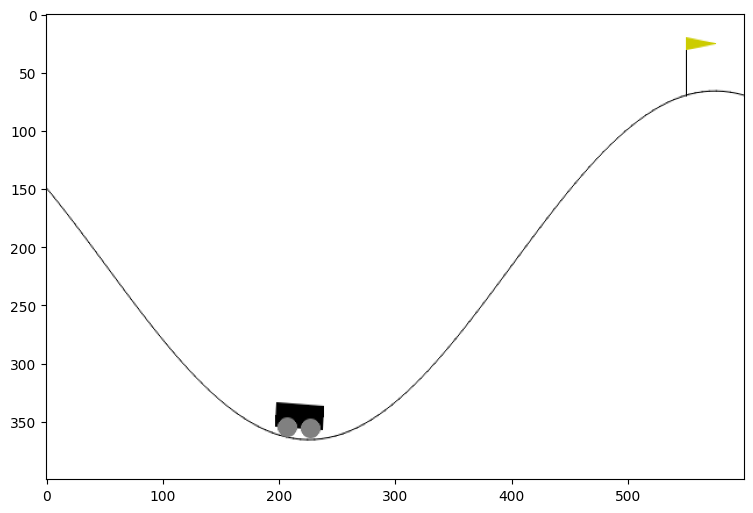

In [27]:
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('MountainCarContinuous-v0')
env.reset()
plt.figure(figsize=(9,9))
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)
env.close()

The MountainCarContinuous environment provides an out-of-the-box model of a car that needs to use the momentum to get on top of the hill. That is very similar to what a skateboarder needs to do in order to skate to the top of the half-pipe wall. 

Summary
=======

Physics principles describe motion and provide an analytical foundation for biomechanics, the science that studies human movement. In this chapter we had an overview of classical mechanics: kinetics and kinematics to analyze movement in sports, including linear and angular laws of motion, potential and kinematic energy. 

## Reference

[*Video Course*](http://ai-learning.vhx.tv) Need a deep dive? Watch my [*video course*](http://ai-learning.vhx.tv) that complements this book with additional examples and video-walkthroughs. 

[*Web Site*](http://activefitness.ai) for research and supplemental materials.